#**Analisis exploratorio de datos**

In [ ]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import matplotlib as plt
from matplotlib import pyplot
import matplotlib.pyplot
matplotlib.pyplot
import matplotlib.pyplot as plt

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df_bh = pd.read_csv("/content/drive/MyDrive/TFM/Data/Bad Hell_nina.12.02.22sav.csv", sep=";")

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (5,76,86,89,90,91) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [ ]:
df_bh.head()

,Studiennummer,date_t1,date_t2,rehab_days,rehab_weeks,rehab_weeks_4_6,birthdate,age,sex,diagnoses,...,Diff_executive,ZDiff_attention,ZDiff_verbal,ZDiff_executive,NZDiff_a,NZDiff_v,NZDiff_e,RZDiff_a,RZDiff_v,RZDiff_e
0,1,4/13/2015,5/21/2015,38,5,2,01.02.1959,"56,28",2,"F32, I44 E66 E79",...,"0,266077166","0,119883798","-0,079301924","0,158280274","0,542971112","0,242216462","0,072732357",1034,872,776
1,2,4/13/2015,5/21/2015,38,5,2,06.03.1984,"30,86",1,"F13, F43",...,"-4,73997021","-2,469434413","2,070554691","-2,796729849","-1,585812035","1,649176822","-2,416072213",83,1391,12
2,3,4/13/2015,5/19/2015,36,5,2,6/14/1965,"49,83",2,"F33, R73",...,"0,263228604","0,114158468","-0,078162839","0,156598802","-0,573001199","0,611800353","-0,276191362",415,1068,574
3,4,4/13/2015,5/21/2015,38,5,2,8/31/1960,"54,62",2,"F32,",...,"0,263742855","0,118647521","-0,079174234","0,156902358","0,326083868","0,290149351","-0,191817194",919,899,622
4,5,4/13/2015,5/21/2015,38,5,2,2/18/1943,"72,15",1,"F32, I10 R55 I48 G43 M15",...,"-4,72272734","-2,471161176","2,070514367","-2,786551588","-1,697818427","1,642538429","-1,497053786",66,1390,99


In [ ]:
print('Cantidad de Filas y columnas:',df_bh.shape)
print('Nombre columnas:',df_bh.columns)

Cantidad de Filas y columnas: (1521, 651)
Nombre columnas: Index(['Studiennummer', 'date_t1', 'date_t2', 'rehab_days', 'rehab_weeks',
       'rehab_weeks_4_6', 'birthdate', 'age', 'sex', 'diagnoses',
       ...
       'Diff_executive', 'ZDiff_attention', 'ZDiff_verbal', 'ZDiff_executive',
       'NZDiff_a', 'NZDiff_v', 'NZDiff_e', 'RZDiff_a', 'RZDiff_v', 'RZDiff_e'],
      dtype='object', length=651)


In [ ]:
df_bh.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1521 entries, 0 to 1520
Columns: 651 entries, Studiennummer to RZDiff_e
dtypes: float64(3), int64(3), object(645)
memory usage: 7.6+ MB


In [ ]:
df_bh.describe

<bound method NDFrame.describe of       Studiennummer    date_t1    date_t2 rehab_days rehab_weeks  \
0                 1  4/13/2015  5/21/2015         38           5   
1                 2  4/13/2015  5/21/2015         38           5   
2                 3  4/13/2015  5/19/2015         36           5   
3                 4  4/13/2015  5/21/2015         38           5   
4                 5  4/13/2015  5/21/2015         38           5   
...             ...        ...        ...        ...         ...   
1516           1517  2/22/2017                                     
1517           1518  2/23/2017                                     
1518           1519  2/23/2017                                     
1519           1520  2/23/2017                                     
1520           1521  2/23/2017                                     

     rehab_weeks_4_6   birthdate    age  sex  \
0                  2  01.02.1959  56,28    2   
1                  2  06.03.1984  30,86    1   
2    

In [ ]:
df_bh.dtypes

Studiennummer     int64
date_t1          object
date_t2          object
rehab_days       object
rehab_weeks      object
                  ...  
NZDiff_v         object
NZDiff_e         object
RZDiff_a         object
RZDiff_v         object
RZDiff_e         object
Length: 651, dtype: object

### Verificando NaN

In [ ]:
missing_data = df_bh.isnull()
missing_data.head(5)

,Studiennummer,date_t1,date_t2,rehab_days,rehab_weeks,rehab_weeks_4_6,birthdate,age,sex,diagnoses,...,Diff_executive,ZDiff_attention,ZDiff_verbal,ZDiff_executive,NZDiff_a,NZDiff_v,NZDiff_e,RZDiff_a,RZDiff_v,RZDiff_e
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [ ]:
for column in missing_data.columns.values.tolist():
    print(column)
    print (missing_data[column].value_counts())
    print("")    

Studiennummer
False    1521
Name: Studiennummer, dtype: int64

date_t1
False    1521
Name: date_t1, dtype: int64

date_t2
False    1521
Name: date_t2, dtype: int64

rehab_days
False    1521
Name: rehab_days, dtype: int64

rehab_weeks
False    1521
Name: rehab_weeks, dtype: int64

rehab_weeks_4_6
False    1521
Name: rehab_weeks_4_6, dtype: int64

birthdate
False    1521
Name: birthdate, dtype: int64

age
False    1521
Name: age, dtype: int64

sex
False    1521
Name: sex, dtype: int64

diagnoses
False    1521
Name: diagnoses, dtype: int64

group
False    1519
True        2
Name: group, dtype: int64

group_affective
False    1519
True        2
Name: group_affective, dtype: int64

group_unipolar
False    1519
True        2
Name: group_unipolar, dtype: int64

height_cm
False    1521
Name: height_cm, dtype: int64

height_m
False    1521
Name: height_m, dtype: int64

weight
False    1521
Name: weight, dtype: int64

BMI_T1
False    1521
Name: BMI_T1, dtype: int64

BMI_T2
False    1521
Name: BM

In [ ]:
df_bh.isna().sum().sort_values()

Studiennummer      0
CHO364_t2          0
HDL365_t2          0
LDL366_t2          0
TG367_t2           0
                  ..
PSSI_ZW_t1R        0
PSSI_ZW_t1N        0
group_unipolar     2
group_affective    2
group              2
Length: 651, dtype: int64

In [ ]:
total = df_bh.isnull().sum().sort_values(ascending = False)
percent = (df_bh.isnull().sum() / df_bh.isnull().count()).sort_values(ascending = False)
missing_data = pd.concat([total, percent], axis = 1, keys = ['Total', 'Percent'])
missing_data.head(20)

,Total,Percent
group_affective,2,0.001315
group_unipolar,2,0.001315
group,2,0.001315
HDL365_t2,0,0.000000
LDL366_t2,0,0.000000
TG367_t2,0,0.000000
CHR374_t2,0,0.000000
NHD375_t2,0,0.000000
NA376_t2,0,0.000000
K377_t2,0,0.000000


### Tratamiento de NaN, eliminando las filas que contienen NaN

In [ ]:
df_bh.dropna(subset=['group_affective'], axis=0, inplace=True)

In [ ]:
df_bh.dropna(subset=['group_unipolar'], axis=0, inplace=True)

In [ ]:
df_bh.dropna(subset=['group'], axis=0, inplace=True)

In [ ]:
# total de NaN
total = df_bh.isnull().sum().sort_values(ascending = False)
percent = (df_bh.isnull().sum() / df_bh.isnull().count()).sort_values(ascending = False)
missing_data = pd.concat([total, percent], axis = 1, keys = ['Total', 'Percent'])
missing_data.head(20)

,Total,Percent
Studiennummer,0,0.0
pH412_t2,0,0.0
CHO364_t2,0,0.0
HDL365_t2,0,0.0
LDL366_t2,0,0.0
TG367_t2,0,0.0
CHR374_t2,0,0.0
NHD375_t2,0,0.0
NA376_t2,0,0.0
K377_t2,0,0.0


In [ ]:
# Tratamiento de datos faltantes:
# eliminar Nas
#df_train = df_train.drop((missing_data[missing_data['Total'] > 1]).index,1)
#df_train = df_train.drop(df_train.loc[df_train['Electrical'].isnull()].index)
#df_train.isnull().sum().max() # Para comprobar que no hay más datos desaparecidos.

In [ ]:
#corr = df_bh.set_index('group').corr()
#sm.graphics.plot_corr(corr, xnames=list(corr.columns))
#plt.show()

# Aqui empiezo a estudiar cada variable


1.   _T1: admission to therapy
2.   _T2: dismissal (4-6 weeks after T1)
3.   group_unipolar: unipolar depressive disorders: n = 906


#**Grupo Cognitive raw scores at t1:**


*   D2_KL_RW_t1: concentration (d2R) at t1
*   CVLT_LS_DG1_5_RW1: California verbal learning test (sum1-5) t1
*   CVLT_VFWI_RW1: CVLT short-delayed free recall t1
*   CVLT_WAI_RW1: CVLT short-delayed cued recall t1
*   CVLT_VFWII_RW1: long-delayed free recall t1
*   CVLT_WAII_RW1: long-delayed cued recall t1
*   FWIT_FWL1: Stroop color word reading t1
*   FWIT_FSB1: Stroop color naming t1
*   FWIT_INT1: Stroop interference t1
*   TMTA1: Trail Making Test part A t1
*   TMTB1: Trail Making Test part B t1
*   MWTB: premorbid IQ (raw score from MWTB)


**Clinical variables of interest**

*   psych_onset: onset first psychiatric diseases (age in years) - 
Inicio de las primeras enfermedades psiquiátricas (edad en años)
*   number_treatments: number of part time/ inpatient treatments - 
Número de tratamientos a tiempo parcial/en régimen de internado


In [ ]:
# procentaje del valor 9999 en la columna psych_onset es 4.87%
((df_bh[df_bh['psych_onset'] == '9999']['psych_onset'].count()  / len(df_bh.axes[0])) * 100)

4.871626069782751

In [ ]:
# 74 elementos 9999 columna psych_onset
df_bh[df_bh['psych_onset'] == '9999']['psych_onset'].count()

74

In [ ]:
# procentaje del espacio vacio ' ' en la columna psych_onset es 22.17%
((df_bh[df_bh['psych_onset'] == ' ']['psych_onset'].count()  / len(df_bh.axes[0])) * 100)

22.119815668202765

In [ ]:
# 336 elementos vacios ' ' columna psych_onset
df_bh[df_bh['psych_onset'] == ' ']['psych_onset'].count()

336

In [ ]:
# 74 elementos 9999 columna number_treatments
df_bh[df_bh['number_treatments'] == '9999']['number_treatments'].count()

74

In [ ]:
# 1017 elementos vacios ' ' columna number_treatments
df_bh[df_bh['number_treatments'] == ' ']['number_treatments'].count()

1017

In [ ]:
# procentaje del valor 9999 en la columna number_treatments es 4.87%
((df_bh[df_bh['number_treatments'] == '9999']['number_treatments'].count()  / len(df_bh.axes[0])) * 100)

4.871626069782751

In [ ]:
# procentaje del espacio vacio ' ' en la columna psych_onset es 66.9%
((df_bh[df_bh['number_treatments'] == ' ']['number_treatments'].count()  / len(df_bh.axes[0])) * 100)

66.95194206714945

In [ ]:
# hay unas columnas con espacios vacios
psych_onset_ = df_bh[df_bh['psych_onset'] == ' ']
psych_onset_.head()

,Studiennummer,date_t1,date_t2,rehab_days,rehab_weeks,rehab_weeks_4_6,birthdate,age,sex,diagnoses,...,Diff_executive,ZDiff_attention,ZDiff_verbal,ZDiff_executive,NZDiff_a,NZDiff_v,NZDiff_e,RZDiff_a,RZDiff_v,RZDiff_e
8,9,4/13/2015,5/21/2015,38,5,2,11/20/1957,"57,4",1,"F43, F13 K59 E73 D35",...,"0,26711764","0,120416222","-0,076486916","0,158894453","0,615937533","0,984895661","0,188335172",1070,1226,843
9,10,4/13/2015,5/21/2015,38,5,2,10/22/1957,"57,48",1,"F33, M81",...,"0,26773134","0,1168947","-0,078007252","0,159256713","-0,006853446","0,643092553","0,253170547",728,1083,880
19,20,4/14/2015,5/22/2015,38,5,2,4/28/1969,"45,96",1,"F32, Z73 E78",...,"0,268451048","0,115359024","-0,078799966","0,159681548","-0,335131844","0,412313897","0,335324085",540,966,926
22,23,4/14/2015,5/22/2015,38,5,2,02.08.1967,"48,18",1,"F33, E03",...,"0,259068736","0,116008716","-0,082723188","0,154143281","-0,210574372","-0,786959565","-0,867985162",610,316,283
24,25,4/16/2015,,,,2,5/20/1971,"43,91",2,"F31, F10 F13",...,"0,272441143","0,123957449","-0,081074855","0,162036854","0,899434908","-0,299096113","0,648949408",1194,560,1088


In [ ]:
# hay unas columnas con valores de 9999
psych_onset9999 = df_bh[df_bh['psych_onset'] == '9999']
psych_onset9999.head()

,Studiennummer,date_t1,date_t2,rehab_days,rehab_weeks,rehab_weeks_4_6,birthdate,age,sex,diagnoses,...,Diff_executive,ZDiff_attention,ZDiff_verbal,ZDiff_executive,NZDiff_a,NZDiff_v,NZDiff_e,RZDiff_a,RZDiff_v,RZDiff_e
33,34,4/27/2015,06.05.2015,39,5,2,,9999,9999,9999,...,"1,555038946","0,603081745","-0,38410472","0,919139056","1,409869352","-1,470264658","1,439290572","1347,5",104,"1356,5"
103,104,5/26/2015,7/20/2015,55,7,2,,9999,9999,9999,...,"1,555038946","0,603081745","-0,38410472","0,919139056","1,409869352","-1,470264658","1,439290572","1347,5",104,"1356,5"
121,122,06.01.2015,,,,2,,9999,9999,9999,...,"1,555038946","0,603081745","-0,38410472","0,919139056","1,409869352","-1,470264658","1,439290572","1347,5",104,"1356,5"
179,180,,,,,2,,9999,9999,9999,...,"1,555038946","0,603081745","-0,38410472","0,919139056","1,409869352","-1,470264658","1,439290572","1347,5",104,"1356,5"
225,226,07.07.2015,8/13/2015,37,5,2,,9999,9999,9999,...,"1,555038946","0,603081745","-0,38410472","0,919139056","1,409869352","-1,470264658","1,439290572","1347,5",104,"1356,5"


In [ ]:
# hay unas columnas con espacios vacios
number_treatments_ = df_bh[df_bh['number_treatments'] == ' ']
number_treatments_.head()

,Studiennummer,date_t1,date_t2,rehab_days,rehab_weeks,rehab_weeks_4_6,birthdate,age,sex,diagnoses,...,Diff_executive,ZDiff_attention,ZDiff_verbal,ZDiff_executive,NZDiff_a,NZDiff_v,NZDiff_e,RZDiff_a,RZDiff_v,RZDiff_e
0,1,4/13/2015,5/21/2015,38,5,2,01.02.1959,"56,28",2,"F32, I44 E66 E79",...,"0,266077166","0,119883798","-0,079301924","0,158280274","0,542971112","0,242216462","0,072732357",1034,872,776
1,2,4/13/2015,5/21/2015,38,5,2,06.03.1984,"30,86",1,"F13, F43",...,"-4,73997021","-2,469434413","2,070554691","-2,796729849","-1,585812035","1,649176822","-2,416072213",83,1391,12
3,4,4/13/2015,5/21/2015,38,5,2,8/31/1960,"54,62",2,"F32,",...,"0,263742855","0,118647521","-0,079174234","0,156902358","0,326083868","0,290149351","-0,191817194",919,899,622
4,5,4/13/2015,5/21/2015,38,5,2,2/18/1943,"72,15",1,"F32, I10 R55 I48 G43 M15",...,"-4,72272734","-2,471161176","2,070514367","-2,786551588","-1,697818427","1,642538429","-1,497053786",66,1390,99
5,6,4/13/2015,5/21/2015,38,5,2,06.06.1963,"51,85",2,"F43, Z73 E66 E78",...,"0,261940824","0,115374526","-0,076555347","0,155838641","-0,331509402","0,960151821","-0,476529585",542,1217,465


In [ ]:
# hay unas columnas con valores de 9999
number_treatments9999 = df_bh[df_bh['number_treatments'] == '9999']
number_treatments9999.head()

,Studiennummer,date_t1,date_t2,rehab_days,rehab_weeks,rehab_weeks_4_6,birthdate,age,sex,diagnoses,...,Diff_executive,ZDiff_attention,ZDiff_verbal,ZDiff_executive,NZDiff_a,NZDiff_v,NZDiff_e,RZDiff_a,RZDiff_v,RZDiff_e
33,34,4/27/2015,06.05.2015,39,5,2,,9999,9999,9999,...,"1,555038946","0,603081745","-0,38410472","0,919139056","1,409869352","-1,470264658","1,439290572","1347,5",104,"1356,5"
103,104,5/26/2015,7/20/2015,55,7,2,,9999,9999,9999,...,"1,555038946","0,603081745","-0,38410472","0,919139056","1,409869352","-1,470264658","1,439290572","1347,5",104,"1356,5"
121,122,06.01.2015,,,,2,,9999,9999,9999,...,"1,555038946","0,603081745","-0,38410472","0,919139056","1,409869352","-1,470264658","1,439290572","1347,5",104,"1356,5"
179,180,,,,,2,,9999,9999,9999,...,"1,555038946","0,603081745","-0,38410472","0,919139056","1,409869352","-1,470264658","1,439290572","1347,5",104,"1356,5"
225,226,07.07.2015,8/13/2015,37,5,2,,9999,9999,9999,...,"1,555038946","0,603081745","-0,38410472","0,919139056","1,409869352","-1,470264658","1,439290572","1347,5",104,"1356,5"


In [ ]:
#Cambio de tipo de datos variables psych_onset, number_treatments
# la variable number_treatments contiene espacios vacios los reemplazo con 0
df_bh['number_treatments'] = df_bh['number_treatments'].str.replace(" ", "0")

In [ ]:
df_bh['number_treatments'] = df_bh['number_treatments'].astype('int')

In [ ]:
#Cambio de tipo de datos variables psych_onset, number_treatments
# la variable number_treatments contiene espacios vacios los reemplazo con 0
df_bh['psych_onset'] = df_bh['psych_onset'].str.replace(" ", "0")

In [ ]:
df_bh['psych_onset'] = df_bh['psych_onset'].astype('int')

In [ ]:
print("Mostrar una sola columna del dataframe[]") 
print(df_bh['psych_onset']) 

Mostrar una sola columna del dataframe[]
0       55
1       24
2       48
3       53
4       71
        ..
1516    20
1517     0
1518    52
1519    35
1520     0
Name: psych_onset, Length: 1519, dtype: int64


In [ ]:
print("Mostrar una sola columna del dataframe[]") 
print(df_bh['number_treatments']) 

Mostrar una sola columna del dataframe[]
0       0
1       0
2       1
3       0
4       0
       ..
1516    2
1517    0
1518    0
1519    0
1520    0
Name: number_treatments, Length: 1519, dtype: int64


In [ ]:
df_bh['number_treatments'].describe()

count    1519.000000
mean      487.691244
std      2153.105580
min         0.000000
25%         0.000000
50%         0.000000
75%         1.000000
max      9999.000000
Name: number_treatments, dtype: float64

In [ ]:
df_bh['psych_onset'].describe()

count    1519.000000
mean      519.273864
std      2147.248837
min         0.000000
25%        14.000000
50%        39.000000
75%        50.000000
max      9999.000000
Name: psych_onset, dtype: float64

In [ ]:
# 
onset = df_bh["psych_onset"]

In [ ]:
number_treatments = df_bh["number_treatments"]

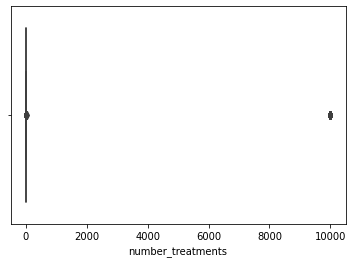

In [ ]:
# Boxplot variable number_treatments
ax = sns.boxplot(x=number_treatments)

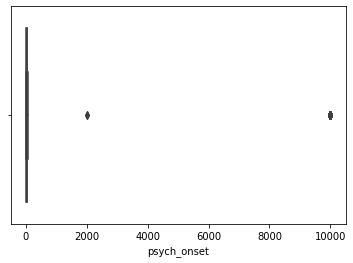

In [ ]:
# Boxplot variable psych_onset
ax = sns.boxplot(x=onset)

Los outliers presentes son de valor 9999 para las dos variables, psych_onset tiene ouliers cerca del valor 2000



---



---



In [ ]:
df_score_t1 = df_bh[['D2_KL_RW_t1', 'CVLT_LS_DG1_5_RW1', 'CVLT_VFWI_RW1', 'CVLT_WAI_RW1', 'CVLT_VFWII_RW1', 'CVLT_WAII_RW1', 'FWIT_FWL1', 'FWIT_FSB1', 'FWIT_INT1', 'TMTA1', 'TMTB1', 'MWTB']]

In [ ]:
df_score_t1.dtypes # todas las variables son tipo objeto por lo tanto se convierten a tipo int y float

D2_KL_RW_t1          object
CVLT_LS_DG1_5_RW1    object
CVLT_VFWI_RW1        object
CVLT_WAI_RW1         object
CVLT_VFWII_RW1       object
CVLT_WAII_RW1        object
FWIT_FWL1            object
FWIT_FSB1            object
FWIT_INT1            object
TMTA1                object
TMTB1                object
MWTB                 object
dtype: object

In [ ]:
df_score_t1.head()

,D2_KL_RW_t1,CVLT_LS_DG1_5_RW1,CVLT_VFWI_RW1,CVLT_WAI_RW1,CVLT_VFWII_RW1,CVLT_WAII_RW1,FWIT_FWL1,FWIT_FSB1,FWIT_INT1,TMTA1,TMTB1,MWTB
0,92,57,13,14,13,15,"30,7","45,9","73,1",44,"77,5",23
1,117,55,9,9,10,10,"25,4","41,2",61,"31,93",41,28
2,126,43,7,7,8,9,"32,7","40,4","73,6","15,9","48,7",29
3,130,54,13,12,11,12,"30,9","52,7","72,5","29,4","52,7",29
4,146,51,10,15,14,14,"36,8","45,4","77,6","37,1","76,7",33


In [ ]:
# count de espacios vacios por variable
df_bh[df_bh[['CVLT_LS_DG1_5_RW1', 'CVLT_VFWI_RW1', 'CVLT_WAI_RW1', 'CVLT_VFWII_RW1', 'CVLT_WAII_RW1', 'MWTB','FWIT_FWL1', 'FWIT_FSB1', 'FWIT_INT1', 'TMTA1', 'TMTB1','D2_KL_RW_t1']] == ' '][['CVLT_LS_DG1_5_RW1', 'CVLT_VFWI_RW1', 'CVLT_WAI_RW1', 'CVLT_VFWII_RW1', 'CVLT_WAII_RW1', 'MWTB','FWIT_FWL1', 'FWIT_FSB1', 'FWIT_INT1', 'TMTA1', 'TMTB1','D2_KL_RW_t1']].count()

CVLT_LS_DG1_5_RW1    12
CVLT_VFWI_RW1        13
CVLT_WAI_RW1         14
CVLT_VFWII_RW1       22
CVLT_WAII_RW1        24
MWTB                 22
FWIT_FWL1            19
FWIT_FSB1            19
FWIT_INT1            19
TMTA1                10
TMTB1                11
D2_KL_RW_t1          15
dtype: int64

In [ ]:
# cambiar espacios vacios por 0
df_bh[['CVLT_LS_DG1_5_RW1', 'CVLT_VFWI_RW1', 'CVLT_WAI_RW1', 'CVLT_VFWII_RW1', 'CVLT_WAII_RW1', 'MWTB']] = df_bh[['CVLT_LS_DG1_5_RW1', 'CVLT_VFWI_RW1', 'CVLT_WAI_RW1', 'CVLT_VFWII_RW1', 'CVLT_WAII_RW1', 'MWTB']].apply(lambda x: x.str.replace(' ','0'))

In [ ]:
# estas columnas se dejan tipo int
df_bh[['CVLT_LS_DG1_5_RW1', 'CVLT_VFWI_RW1', 'CVLT_WAI_RW1', 'CVLT_VFWII_RW1', 'CVLT_WAII_RW1','MWTB']] = df_bh[['CVLT_LS_DG1_5_RW1', 'CVLT_VFWI_RW1', 'CVLT_WAI_RW1', 'CVLT_VFWII_RW1', 'CVLT_WAII_RW1','MWTB']].astype("int")

In [ ]:
# cambiar espacios vacios por 0
df_bh[['FWIT_FWL1', 'FWIT_FSB1', 'FWIT_INT1', 'TMTA1', 'TMTB1','D2_KL_RW_t1']] = df_bh[['FWIT_FWL1', 'FWIT_FSB1', 'FWIT_INT1', 'TMTA1', 'TMTB1','D2_KL_RW_t1']].apply(lambda x: x.str.replace(' ','0'))

In [ ]:
# cambiar comas por puntos
df_bh[['FWIT_FWL1', 'FWIT_FSB1', 'FWIT_INT1', 'TMTA1', 'TMTB1','D2_KL_RW_t1']] = df_bh[['FWIT_FWL1', 'FWIT_FSB1', 'FWIT_INT1', 'TMTA1', 'TMTB1','D2_KL_RW_t1']].apply(lambda x: x.str.replace(',','.'))

In [ ]:
# estas columnas se dejan tipo float
df_bh[['FWIT_FWL1', 'FWIT_FSB1', 'FWIT_INT1', 'TMTA1', 'TMTB1','D2_KL_RW_t1']] = df_bh[['FWIT_FWL1', 'FWIT_FSB1', 'FWIT_INT1', 'TMTA1', 'TMTB1','D2_KL_RW_t1']].astype("float")

In [ ]:
print("Mostrar una sola columna del dataframe[]") 
print(df_bh['FWIT_FWL1']) 

Mostrar una sola columna del dataframe[]
0       30.70
1       25.40
2       32.70
3       30.90
4       36.80
        ...  
1516    34.22
1517    25.90
1518    20.60
1519    30.70
1520    38.40
Name: FWIT_FWL1, Length: 1519, dtype: float64


#**Grupo Cognitive domain z scores at t1:**


*   Attention_processing_speed_1
*   Verbal_memory_1
*   Excecutive_function_1
*   ZAttention_processing_speed_1
*   ZVerbal_memory_1
*   ZExcecutive_function_1
*   Attention_processing_speed_2
*   Verbal_memory_2
*   Executive_function_2
*   ZAttention_processing_speed_2
*   ZVerbal_memory_2
*   ZExecutive_function_2

In [ ]:
# asigno las variables a el dataframe df_domain_z
df_domain_z = df_bh[['Attention_processing_speed_1','Verbal_memory_1','Excecutive_function_1','ZAttention_processing_speed_1','ZVerbal_memory_1','ZExcecutive_function_1','Attention_processing_speed_2','Verbal_memory_2','Executive_function_2','ZAttention_processing_speed_2','ZVerbal_memory_2','ZExecutive_function_2']]

In [ ]:
df_domain_z.head()

,Attention_processing_speed_1,Verbal_memory_1,Excecutive_function_1,ZAttention_processing_speed_1,ZVerbal_memory_1,ZExcecutive_function_1,Attention_processing_speed_2,Verbal_memory_2,Executive_function_2,ZAttention_processing_speed_2,ZVerbal_memory_2,ZExecutive_function_2
0,"0,796252169","-0,394573387","0,737732747","0,379304625","-0,332374052","0,396612578","1,015420827","-0,487956248","1,003809913","0,49537007","-0,484149898","0,514840166"
1,"0,811490262","-0,395993646","0,753998578","0,386540582","-0,333563899","0,405354238","-3,910955005","2,039383283","-3,985971631","-1,897069272","2,020080099","-2,035346319"
2,"0,818294114","-0,399746124","0,747755377","0,389771457","-0,336707603","0,401998987","1,0265362","-0,49178914","1,010983981","0,500768126","-0,487947744","0,518506701"
3,"0,811887258","-0,39649687","0,746651748","0,3867291","-0,333985484","0,401405869","1,02869653","-0,489729535","1,010394603","0,501817267","-0,485906971","0,518205481"
4,"0,814785722","-0,395946214","0,736755708","0,388105463","-0,333524162","0,396087493","-3,910955005","2,039383283","-3,985971631","-1,897069272","2,020080099","-2,035346319"


In [ ]:
df_domain_z.dtypes

Attention_processing_speed_1     object
Verbal_memory_1                  object
Excecutive_function_1            object
ZAttention_processing_speed_1    object
ZVerbal_memory_1                 object
ZExcecutive_function_1           object
Attention_processing_speed_2     object
Verbal_memory_2                  object
Executive_function_2             object
ZAttention_processing_speed_2    object
ZVerbal_memory_2                 object
ZExecutive_function_2            object
dtype: object

In [ ]:
# count de espacios vacios por variable
df_bh[df_bh[['Attention_processing_speed_1','Verbal_memory_1','Excecutive_function_1','ZAttention_processing_speed_1','ZVerbal_memory_1','ZExcecutive_function_1','Attention_processing_speed_2','Verbal_memory_2','Executive_function_2','ZAttention_processing_speed_2','ZVerbal_memory_2','ZExecutive_function_2']] == ' '][['Attention_processing_speed_1','Verbal_memory_1','Excecutive_function_1','ZAttention_processing_speed_1','ZVerbal_memory_1','ZExcecutive_function_1','Attention_processing_speed_2','Verbal_memory_2','Executive_function_2','ZAttention_processing_speed_2','ZVerbal_memory_2','ZExecutive_function_2']].count()

Attention_processing_speed_1     22
Verbal_memory_1                  24
Excecutive_function_1            20
ZAttention_processing_speed_1    22
ZVerbal_memory_1                 24
ZExcecutive_function_1           20
Attention_processing_speed_2     55
Verbal_memory_2                  47
Executive_function_2             51
ZAttention_processing_speed_2    55
ZVerbal_memory_2                 47
ZExecutive_function_2            51
dtype: int64

In [ ]:
# cambiar comas por puntos
df_bh[['Attention_processing_speed_1','Verbal_memory_1','Excecutive_function_1','ZAttention_processing_speed_1','ZVerbal_memory_1','ZExcecutive_function_1','Attention_processing_speed_2','Verbal_memory_2','Executive_function_2','ZAttention_processing_speed_2','ZVerbal_memory_2','ZExecutive_function_2']] = df_bh[['Attention_processing_speed_1','Verbal_memory_1','Excecutive_function_1','ZAttention_processing_speed_1','ZVerbal_memory_1','ZExcecutive_function_1','Attention_processing_speed_2','Verbal_memory_2','Executive_function_2','ZAttention_processing_speed_2','ZVerbal_memory_2','ZExecutive_function_2']].apply(lambda x: x.str.replace(',','.'))

In [ ]:
# cambiar espacios vacios por 0
df_bh[['Attention_processing_speed_1','Verbal_memory_1','Excecutive_function_1','ZAttention_processing_speed_1','ZVerbal_memory_1','ZExcecutive_function_1','Attention_processing_speed_2','Verbal_memory_2','Executive_function_2','ZAttention_processing_speed_2','ZVerbal_memory_2','ZExecutive_function_2']] = df_bh[['Attention_processing_speed_1','Verbal_memory_1','Excecutive_function_1','ZAttention_processing_speed_1','ZVerbal_memory_1','ZExcecutive_function_1','Attention_processing_speed_2','Verbal_memory_2','Executive_function_2','ZAttention_processing_speed_2','ZVerbal_memory_2','ZExecutive_function_2']].apply(lambda x: x.str.replace(' ','0'))

In [ ]:
# cambio a tipo float
df_bh[['Attention_processing_speed_1','Verbal_memory_1','Excecutive_function_1','ZAttention_processing_speed_1','ZVerbal_memory_1','ZExcecutive_function_1','Attention_processing_speed_2','Verbal_memory_2','Executive_function_2','ZAttention_processing_speed_2','ZVerbal_memory_2','ZExecutive_function_2']] = df_bh[['Attention_processing_speed_1','Verbal_memory_1','Excecutive_function_1','ZAttention_processing_speed_1','ZVerbal_memory_1','ZExcecutive_function_1','Attention_processing_speed_2','Verbal_memory_2','Executive_function_2','ZAttention_processing_speed_2','ZVerbal_memory_2','ZExecutive_function_2']].astype("float")

#**Grupo Functional outcome scales at t1 and t2:**


*   GAF_t1
*   GAF_t2
*   SF12_physical_t1
*   SF12_psychological_t1
*   SF12_physical_t2
*   SF12_psychological_t2
*   SCLR_GSI_t1
*   SCLR_PSDI_t1
*   SCLR_PST_t1
*   SCLR_GSI_t2
*   SCLR_PSDI_t2
*   SCLR_PST_t2
*   BDI_sum_t1R
*   BDI_sum_t2R
*   HAMD_sum_t1
*   HAMD_sum_t2
*   WHOQOL_psych_t1
*   WHOQOL_phys_t1
*   WHOQOL_soc_t1
*   WHOQOL_environ_t1
*   WHOQOL_global_t1
*   WHOQOL_psych_t2
*   WHOQOL_phys_t2
*   WHOQOL_soc_t2
*   WHOQOL_environ_t2
*   WHOQOL_global_t2









In [ ]:
# asigno las variables a el dataframe df_outcome
df_outcome = df_bh[['GAF_t1',
'GAF_t2',
'SF12_physical_t1',
'SF12_psychological_t1',
'SF12_physical_t2',
'SF12_psychological_t2',
'SCLR_GSI_t1',
'SCLR_PSDI_t1',
'SCLR_PST_t1',
'SCLR_GSI_t2',
'SCLR_PSDI_t2',
'SCLR_PST_t2',
'BDI_sum_t1R',
'BDI_sum_t2R',
'HAMD_sum_t1',
'HAMD_sum_t2',
'WHOQOL_psych_t1',
'WHOQOL_phys_t1',
'WHOQOL_soc_t1',
'WHOQOL_environ_t1',
'WHOQOL_global_t1',
'WHOQOL_psych_t2',
'WHOQOL_phys_t2',
'WHOQOL_soc_t2',
'WHOQOL_environ_t2',
'WHOQOL_global_t2']]

In [ ]:
df_outcome.head()

,GAF_t1,GAF_t2,SF12_physical_t1,SF12_psychological_t1,SF12_physical_t2,SF12_psychological_t2,SCLR_GSI_t1,SCLR_PSDI_t1,SCLR_PST_t1,SCLR_GSI_t2,...,WHOQOL_psych_t1,WHOQOL_phys_t1,WHOQOL_soc_t1,WHOQOL_environ_t1,WHOQOL_global_t1,WHOQOL_psych_t2,WHOQOL_phys_t2,WHOQOL_soc_t2,WHOQOL_environ_t2,WHOQOL_global_t2
0,,,,,,,,,,,...,,,,,,,,,,
1,,,"42,2","22,9",,,"1,72","2,12",73,,...,33,57,58,66,50,,,,,
2,,,53,"32,1","55,2","47,3","0,48","1,54",28,"0,34",...,46,79,25,88,50,67,93,33,88,75
3,,,"33,3","33,1","39,9","20,3","0,81","1,92",38,"1,07",...,50,43,50,84,38,33,29,50,84,38
4,,,"45,5","38,2",,,"0,74","1,81",37,,...,46,57,75,91,75,,,,,


In [ ]:
df_outcome.shape

(1519, 26)

In [ ]:
df_outcome.dtypes

GAF_t1                   object
GAF_t2                   object
SF12_physical_t1         object
SF12_psychological_t1    object
SF12_physical_t2         object
SF12_psychological_t2    object
SCLR_GSI_t1              object
SCLR_PSDI_t1             object
SCLR_PST_t1              object
SCLR_GSI_t2              object
SCLR_PSDI_t2             object
SCLR_PST_t2              object
BDI_sum_t1R              object
BDI_sum_t2R              object
HAMD_sum_t1              object
HAMD_sum_t2              object
WHOQOL_psych_t1          object
WHOQOL_phys_t1           object
WHOQOL_soc_t1            object
WHOQOL_environ_t1        object
WHOQOL_global_t1         object
WHOQOL_psych_t2          object
WHOQOL_phys_t2           object
WHOQOL_soc_t2            object
WHOQOL_environ_t2        object
WHOQOL_global_t2         object
dtype: object

In [ ]:
# count de espacios vacios por variable
df_bh[df_bh[['GAF_t1',
'GAF_t2',
'SF12_physical_t1',
'SF12_psychological_t1',
'SF12_physical_t2',
'SF12_psychological_t2',
'SCLR_GSI_t1',
'SCLR_PSDI_t1',
'SCLR_PST_t1',
'SCLR_GSI_t2',
'SCLR_PSDI_t2',
'SCLR_PST_t2',
'BDI_sum_t1R',
'BDI_sum_t2R',
'HAMD_sum_t1',
'HAMD_sum_t2',
'WHOQOL_psych_t1',
'WHOQOL_phys_t1',
'WHOQOL_soc_t1',
'WHOQOL_environ_t1',
'WHOQOL_global_t1',
'WHOQOL_psych_t2',
'WHOQOL_phys_t2',
'WHOQOL_soc_t2',
'WHOQOL_environ_t2',
'WHOQOL_global_t2']] == ' '][['GAF_t1',
'GAF_t2',
'SF12_physical_t1',
'SF12_psychological_t1',
'SF12_physical_t2',
'SF12_psychological_t2',
'SCLR_GSI_t1',
'SCLR_PSDI_t1',
'SCLR_PST_t1',
'SCLR_GSI_t2',
'SCLR_PSDI_t2',
'SCLR_PST_t2',
'BDI_sum_t1R',
'BDI_sum_t2R',
'HAMD_sum_t1',
'HAMD_sum_t2',
'WHOQOL_psych_t1',
'WHOQOL_phys_t1',
'WHOQOL_soc_t1',
'WHOQOL_environ_t1',
'WHOQOL_global_t1',
'WHOQOL_psych_t2',
'WHOQOL_phys_t2',
'WHOQOL_soc_t2',
'WHOQOL_environ_t2',
'WHOQOL_global_t2']].count()

GAF_t1                   226
GAF_t2                   116
SF12_physical_t1         646
SF12_psychological_t1    646
SF12_physical_t2         766
SF12_psychological_t2    766
SCLR_GSI_t1               46
SCLR_PSDI_t1              46
SCLR_PST_t1               46
SCLR_GSI_t2              216
SCLR_PSDI_t2             216
SCLR_PST_t2              216
BDI_sum_t1R                9
BDI_sum_t2R               46
HAMD_sum_t1              490
HAMD_sum_t2              503
WHOQOL_psych_t1           54
WHOQOL_phys_t1            54
WHOQOL_soc_t1             54
WHOQOL_environ_t1         54
WHOQOL_global_t1          54
WHOQOL_psych_t2          218
WHOQOL_phys_t2           218
WHOQOL_soc_t2            218
WHOQOL_environ_t2        218
WHOQOL_global_t2         218
dtype: int64

In [ ]:
# cambiar espacios vacios por 0
df_bh[['GAF_t1',
'GAF_t2',
'SF12_physical_t1',
'SF12_psychological_t1',
'SF12_physical_t2',
'SF12_psychological_t2',
'SCLR_GSI_t1',
'SCLR_PSDI_t1',
'SCLR_PST_t1',
'SCLR_GSI_t2',
'SCLR_PSDI_t2',
'SCLR_PST_t2',
'BDI_sum_t1R',
'BDI_sum_t2R',
'HAMD_sum_t1',
'HAMD_sum_t2',
'WHOQOL_psych_t1',
'WHOQOL_phys_t1',
'WHOQOL_soc_t1',
'WHOQOL_environ_t1',
'WHOQOL_global_t1',
'WHOQOL_psych_t2',
'WHOQOL_phys_t2',
'WHOQOL_soc_t2',
'WHOQOL_environ_t2',
'WHOQOL_global_t2']] = df_bh[['GAF_t1',
'GAF_t2',
'SF12_physical_t1',
'SF12_psychological_t1',
'SF12_physical_t2',
'SF12_psychological_t2',
'SCLR_GSI_t1',
'SCLR_PSDI_t1',
'SCLR_PST_t1',
'SCLR_GSI_t2',
'SCLR_PSDI_t2',
'SCLR_PST_t2',
'BDI_sum_t1R',
'BDI_sum_t2R',
'HAMD_sum_t1',
'HAMD_sum_t2',
'WHOQOL_psych_t1',
'WHOQOL_phys_t1',
'WHOQOL_soc_t1',
'WHOQOL_environ_t1',
'WHOQOL_global_t1',
'WHOQOL_psych_t2',
'WHOQOL_phys_t2',
'WHOQOL_soc_t2',
'WHOQOL_environ_t2',
'WHOQOL_global_t2']].apply(lambda x: x.str.replace(' ','0'))

In [ ]:
# cambio a tipo int
df_bh[['WHOQOL_psych_t1',
'WHOQOL_phys_t1',
'WHOQOL_soc_t1',
'WHOQOL_environ_t1',
'WHOQOL_global_t1',
'WHOQOL_psych_t2',
'WHOQOL_phys_t2',
'WHOQOL_soc_t2',
'WHOQOL_environ_t2',
'WHOQOL_global_t2']] = df_bh[['WHOQOL_psych_t1',
'WHOQOL_phys_t1',
'WHOQOL_soc_t1',
'WHOQOL_environ_t1',
'WHOQOL_global_t1',
'WHOQOL_psych_t2',
'WHOQOL_phys_t2',
'WHOQOL_soc_t2',
'WHOQOL_environ_t2',
'WHOQOL_global_t2']].astype("int")

In [ ]:
# cambio a tipo int
df_bh[['SCLR_PST_t2',
'BDI_sum_t1R',
'BDI_sum_t2R',
'HAMD_sum_t1',
'HAMD_sum_t2']] = df_bh[['SCLR_PST_t2',
'BDI_sum_t1R',
'BDI_sum_t2R',
'HAMD_sum_t1',
'HAMD_sum_t2']].astype("int")

In [ ]:
# cambiar comas por puntos
df_bh[['SF12_physical_t1','SF12_psychological_t1','SF12_physical_t2','SF12_psychological_t2','SCLR_GSI_t1','SCLR_PSDI_t1','SCLR_GSI_t2']] = df_bh[['SF12_physical_t1','SF12_psychological_t1','SF12_physical_t2','SF12_psychological_t2','SCLR_GSI_t1','SCLR_PSDI_t1','SCLR_GSI_t2']].apply(lambda x: x.str.replace(',','.'))

In [ ]:
# cambiar a tipo float
df_bh[['SF12_physical_t1','SF12_psychological_t1','SF12_physical_t2','SF12_psychological_t2','SCLR_GSI_t1','SCLR_PSDI_t1','SCLR_GSI_t2']] = df_bh[['SF12_physical_t1','SF12_psychological_t1','SF12_physical_t2','SF12_psychological_t2','SCLR_GSI_t1','SCLR_PSDI_t1','SCLR_GSI_t2']].astype("float")

In [ ]:
# rellenar nan con 0 el cambio dejó los espacios vacios por NaN
df_bh[['GAF_t1','GAF_t2']] = df_bh[['GAF_t1','GAF_t2']].fillna(0)

In [ ]:
# cambiar a tipo int
df_bh[['GAF_t1','GAF_t2']]= df_bh[['GAF_t1','GAF_t2']].astype("int")

In [ ]:
# cambiar a tipo int
df_bh['SCLR_PST_t1'] = df_bh['SCLR_PST_t1'].astype("int")

In [ ]:
# cambiar coma por punto
df_bh['SCLR_PSDI_t2'] = df_bh['SCLR_PSDI_t2'].apply(lambda x: x.replace(',','.'))

In [ ]:
# cambiar a tipo float
df_bh['SCLR_PSDI_t2']= df_bh['SCLR_PSDI_t2'].astype("float")

#**Somatic health variables:**


*   BMI_T1
*   BMI_T2
*   WHR_t1
*   WHR_t2
*   WHTR_t1
*   WHTR_t2
*   RR_sys
*   RR_dia
*   HDL365_t1
*   LDL366_t1
*   TG367_t1
*   CRh393_t1
*   IL6457_t1
*   Tryptophan_t1
*   Kynurenine_t1
*   Kyn_Trp_t1

In [ ]:
# asigno las variables a el dataframe df_somatic
df_somatic = df_bh[['BMI_T1',
'BMI_T2',
'WHR_t1',
'WHR_t2',
'WHTR_t1',
'WHTR_t2',
'RR_sys',
'RR_dia',
'HDL365_t1',
'LDL366_t1',
'TG367_t1',
'CRh393_t1',
'IL6457_t1',
'BDI_sum_t2R',
'Tryptophan_t1',
'Kynurenine_t1',
'Kyn_Trp_t1']]

In [ ]:
#df_somatic.head()
df_somatic.dtypes

BMI_T1           object
BMI_T2           object
WHR_t1           object
WHR_t2           object
WHTR_t1          object
WHTR_t2          object
RR_sys           object
RR_dia           object
HDL365_t1        object
LDL366_t1        object
TG367_t1         object
CRh393_t1        object
IL6457_t1        object
BDI_sum_t2R       int64
Tryptophan_t1    object
Kynurenine_t1    object
Kyn_Trp_t1       object
dtype: object

In [ ]:
# count de espacios vacios por variable
df_bh[df_bh[['BMI_T1',
'BMI_T2',
'WHR_t1',
'WHR_t2',
'WHTR_t1',
'WHTR_t2',
'RR_sys',
'RR_dia',
'HDL365_t1',
'LDL366_t1',
'TG367_t1',
'CRh393_t1',
'IL6457_t1',
'BDI_sum_t2R',
'Tryptophan_t1',
'Kynurenine_t1',
'Kyn_Trp_t1']] == ' '][['BMI_T1',
'BMI_T2',
'WHR_t1',
'WHR_t2',
'WHTR_t1',
'WHTR_t2',
'RR_sys',
'RR_dia',
'HDL365_t1',
'LDL366_t1',
'TG367_t1',
'CRh393_t1',
'IL6457_t1',
'BDI_sum_t2R',
'Tryptophan_t1',
'Kynurenine_t1',
'Kyn_Trp_t1']].count()

BMI_T1            22
BMI_T2            27
WHR_t1           323
WHR_t2           228
WHTR_t1          334
WHTR_t2          235
RR_sys            60
RR_dia            60
HDL365_t1          2
LDL366_t1          2
TG367_t1           2
CRh393_t1          8
IL6457_t1          2
BDI_sum_t2R        0
Tryptophan_t1    751
Kynurenine_t1    751
Kyn_Trp_t1       769
dtype: int64

In [ ]:
# reemplazar espacios vacios por 0
df_bh[['BMI_T1',
'BMI_T2',
'WHR_t1',
'WHR_t2',
'WHTR_t1',
'WHTR_t2',
'RR_sys',
'RR_dia',
'HDL365_t1',
'LDL366_t1',
'TG367_t1',
'CRh393_t1',
'IL6457_t1',
'BDI_sum_t2R',
'Tryptophan_t1',
'Kynurenine_t1',
'Kyn_Trp_t1']] =  df_bh[['BMI_T1',
'BMI_T2',
'WHR_t1',
'WHR_t2',
'WHTR_t1',
'WHTR_t2',
'RR_sys',
'RR_dia',
'HDL365_t1',
'LDL366_t1',
'TG367_t1',
'CRh393_t1',
'IL6457_t1',
'BDI_sum_t2R',
'Tryptophan_t1',
'Kynurenine_t1',
'Kyn_Trp_t1']].replace(" ", "0")

In [ ]:
df_bh[['RR_sys',
'RR_dia',
'HDL365_t1',
'LDL366_t1',
'TG367_t1',
'BDI_sum_t2R']] = df_bh[['RR_sys',
'RR_dia',
'HDL365_t1',
'LDL366_t1',
'TG367_t1',
'BDI_sum_t2R']].astype("int")

In [ ]:
# reemplazar comas por puntos
df_bh[['BMI_T1',
'BMI_T2',
'WHR_t1',
'WHR_t2',
'WHTR_t1',
'WHTR_t2',
'CRh393_t1',
'IL6457_t1',
'Tryptophan_t1',
'Kynurenine_t1',
'Kyn_Trp_t1']] = df_bh[['BMI_T1',
'BMI_T2',
'WHR_t1',
'WHR_t2',
'WHTR_t1',
'WHTR_t2',
'CRh393_t1',
'IL6457_t1',
'Tryptophan_t1',
'Kynurenine_t1',
'Kyn_Trp_t1']].apply(lambda x: x.str.replace(',','.'))

In [ ]:
# convertir a float
df_bh[['BMI_T1','BMI_T2','WHR_t2','CRh393_t1','IL6457_t1','Tryptophan_t1','Kynurenine_t1','WHR_t1','WHTR_t1','WHTR_t2','Kyn_Trp_t1']]= df_bh[['BMI_T1','BMI_T2','WHR_t2','CRh393_t1','IL6457_t1','Tryptophan_t1','Kynurenine_t1','WHR_t1','WHTR_t1','WHTR_t2','Kyn_Trp_t1']].astype("float")

In [ ]:
#grupo_diagnoses= df_bh.groupby(['diagnoses']).size()
#grupo_diagnoses

In [ ]:
#df_pop_guada = df_bh[df_bh["age"] != '' ]
#df_pop_guada.head(5)

##Correlación entre variables

Variables importantes:


*   psych_onset
*   number_treatments




/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


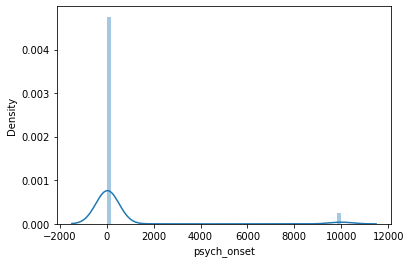

In [ ]:
sns.distplot(df_bh['psych_onset'])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


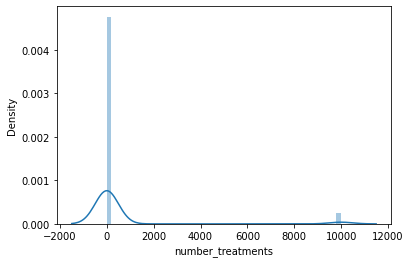

In [ ]:
sns.distplot(df_bh['number_treatments'])

En la siguiente celda estoy asignando un dataframe con todas la variables numericas que tenemos para el estudio junto con la variable psych_onset

In [ ]:
# todas las variables son numericas
df_num = df_bh[['psych_onset','D2_KL_RW_t1', 'CVLT_LS_DG1_5_RW1', 'CVLT_VFWI_RW1','CVLT_WAI_RW1', 'CVLT_VFWII_RW1', 'CVLT_WAII_RW1',
 'FWIT_FWL1', 'FWIT_FSB1', 'FWIT_INT1', 'TMTA1', 'TMTB1', 'MWTB','Attention_processing_speed_1','Verbal_memory_1','Excecutive_function_1','ZAttention_processing_speed_1',
'ZVerbal_memory_1','ZExcecutive_function_1','Attention_processing_speed_2','Verbal_memory_2','Executive_function_2',
'ZAttention_processing_speed_2','ZVerbal_memory_2','ZExecutive_function_2','GAF_t1','GAF_t2','SF12_physical_t1','SF12_psychological_t1','SF12_physical_t2','SF12_psychological_t2',
'SCLR_GSI_t1','SCLR_PSDI_t1','SCLR_PST_t1','SCLR_GSI_t2','SCLR_PSDI_t2','SCLR_PST_t2','BDI_sum_t1R','BDI_sum_t2R','HAMD_sum_t1',
'HAMD_sum_t2','WHOQOL_psych_t1','WHOQOL_phys_t1','WHOQOL_soc_t1','WHOQOL_environ_t1','WHOQOL_global_t1','WHOQOL_psych_t2',
'WHOQOL_phys_t2','WHOQOL_soc_t2','WHOQOL_environ_t2','WHOQOL_global_t2','BMI_T1','BMI_T2','WHR_t1','WHR_t2','WHTR_t1','WHTR_t2','RR_sys','RR_dia','HDL365_t1','LDL366_t1','TG367_t1',
'CRh393_t1','IL6457_t1','BDI_sum_t2R','Tryptophan_t1','Kynurenine_t1','Kyn_Trp_t1']]

In [ ]:
df_num.head()

,psych_onset,D2_KL_RW_t1,CVLT_LS_DG1_5_RW1,CVLT_VFWI_RW1,CVLT_WAI_RW1,CVLT_VFWII_RW1,CVLT_WAII_RW1,FWIT_FWL1,FWIT_FSB1,FWIT_INT1,...,RR_dia,HDL365_t1,LDL366_t1,TG367_t1,CRh393_t1,IL6457_t1,BDI_sum_t2R,Tryptophan_t1,Kynurenine_t1,Kyn_Trp_t1
0,55,92.0,57,13,14,13,15,30.7,45.9,73.1,...,85,52,150,136,3.0,1.63,16,66.2,1.99,0.030060
1,24,117.0,55,9,9,10,10,25.4,41.2,61.0,...,70,57,127,100,0.7,0.00,9999,57.6,1.53,0.026562
2,48,126.0,43,7,7,8,9,32.7,40.4,73.6,...,95,35,186,137,16.2,6.56,10,57.1,2.24,0.039229
3,53,130.0,54,13,12,11,12,30.9,52.7,72.5,...,93,47,140,111,0.5,1.92,16,68.1,1.55,0.022761
4,71,146.0,51,10,15,14,14,36.8,45.4,77.6,...,77,68,148,115,9.4,2.38,9999,60.5,2.42,0.040000


In [ ]:
# el resto de variables importantes tambien tienen el 9999
por_9999 = df_num[df_num['psych_onset'] == 9999]
por_9999.head()

,psych_onset,D2_KL_RW_t1,CVLT_LS_DG1_5_RW1,CVLT_VFWI_RW1,CVLT_WAI_RW1,CVLT_VFWII_RW1,CVLT_WAII_RW1,FWIT_FWL1,FWIT_FSB1,FWIT_INT1,...,RR_dia,HDL365_t1,LDL366_t1,TG367_t1,CRh393_t1,IL6457_t1,BDI_sum_t2R,Tryptophan_t1,Kynurenine_t1,Kyn_Trp_t1
33,9999,9999.0,9999,9999,9999,9999,9999,9999.0,9999.0,9999.0,...,9999,9999,9999,9999,9999.0,9999.0,9999,9999.0,9999.00,0.000000
103,9999,9999.0,9999,9999,9999,9999,9999,9999.0,9999.0,9999.0,...,9999,9999,9999,9999,9999.0,9999.0,9999,9999.0,9999.00,0.000000
121,9999,9999.0,9999,9999,9999,9999,9999,9999.0,9999.0,9999.0,...,9999,9999,9999,9999,9999.0,9999.0,9999,60.6,1.46,0.024092
179,9999,9999.0,9999,9999,9999,9999,9999,9999.0,9999.0,9999.0,...,9999,9999,9999,9999,9999.0,9999.0,9999,60.6,1.51,0.024917
225,9999,9999.0,9999,9999,9999,9999,9999,9999.0,9999.0,9999.0,...,9999,9999,9999,9999,9999.0,9999.0,9999,9999.0,9999.00,0.000000


In [ ]:
por_9999.shape

(74, 68)

In [ ]:
freq = df_num.groupby(['psych_onset']).count() 
print(freq)

             D2_KL_RW_t1  CVLT_LS_DG1_5_RW1  CVLT_VFWI_RW1  CVLT_WAI_RW1  \
psych_onset                                                                
0                    337                337            337           337   
3                      1                  1              1             1   
5                      5                  5              5             5   
6                      1                  1              1             1   
7                      3                  3              3             3   
...                  ...                ...            ...           ...   
71                     1                  1              1             1   
72                     1                  1              1             1   
2007                   1                  1              1             1   
2011                   1                  1              1             1   
9999                  74                 74             74            74   

           

In [ ]:
# ver valores unicos
print(df_num.groupby('psych_onset').psych_onset.nunique())

psych_onset
0       1
3       1
5       1
6       1
7       1
       ..
71      1
72      1
2007    1
2011    1
9999    1
Name: psych_onset, Length: 68, dtype: int64


In [ ]:
print("En la columna 'psych_onset' El numero 9999 se repite {} veces, 2007, {} vez,  2011, {} vez ".format(
      df_num[df_num['psych_onset'] == 9999]['psych_onset'].count(), df_num[df_num['psych_onset'] == 2007]['psych_onset'].count(), df_num[df_num['psych_onset'] == 2011]['psych_onset'].count()  ))

En la columna 'psych_onset' El numero 9999 se repite 74 veces, 2007, 1 vez,  2011, 1 vez 


In [ ]:
# procentaje del valor 9999 en la columna psych_onset es 4.87%
((df_num[df_num['psych_onset'] == 9999]['psych_onset'].count()  / len(df_num.axes[0])) * 100)

4.871626069782751

0       337
9999     74
40       63
50       61
45       47
       ... 
69        1
67        1
72        1
2011      1
3         1
Name: psych_onset, Length: 68, dtype: int64


Text(0.5, 1.0, 'Distribucion en la columna objetivo')

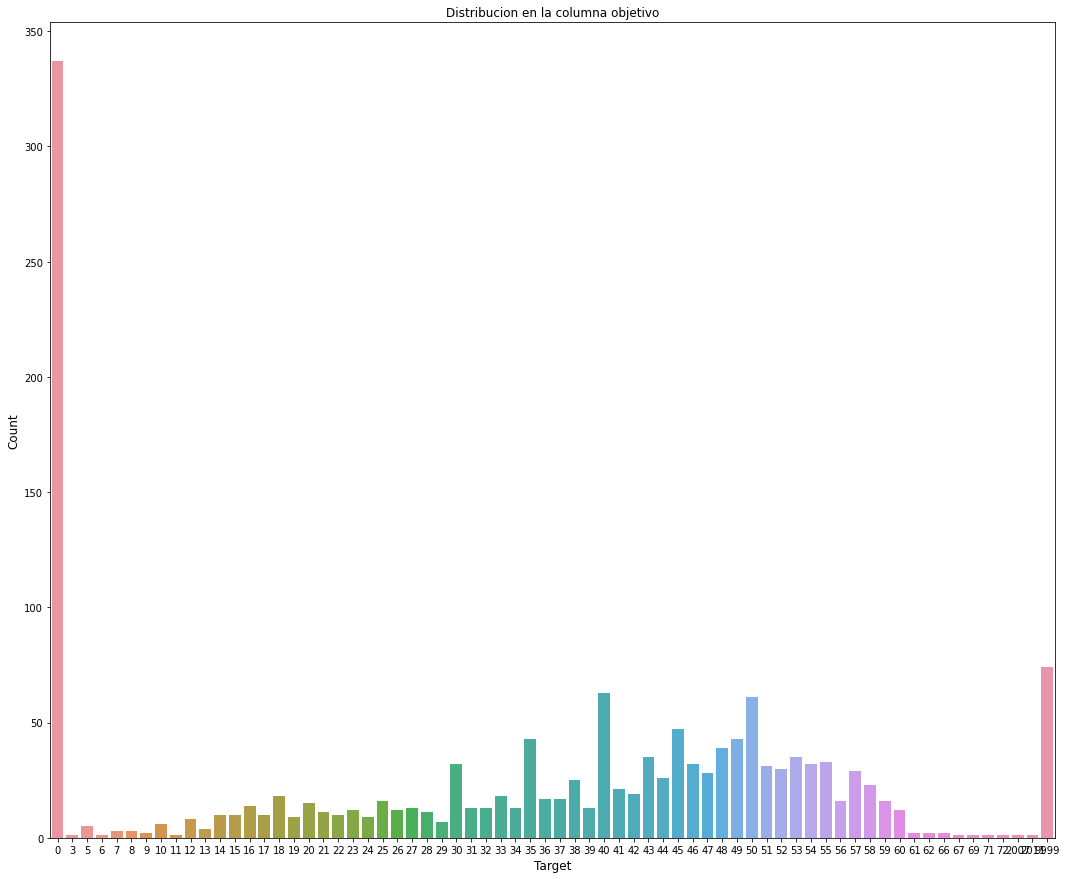

In [ ]:
print(df_num['psych_onset'].value_counts())
plt.figure(figsize = (18,15))
sns.countplot(x = df_num['psych_onset'])
plt.xlabel('Target', size = 12)
plt.ylabel('Count', size = 12)
plt.title('Distribucion en la columna objetivo', size = 12)

In [ ]:
# me tocó reemplazar 9999 con 0 ese valor con 9999 no es correcto, lo reemplazo en todo el dataframe df_num
df_num= df_num.replace([9999],0)

In [ ]:
# ya no hay valores de 9999
por_9999_ = df_num[df_num['psych_onset'] == 9999]
por_9999_.head(15)

,psych_onset,D2_KL_RW_t1,CVLT_LS_DG1_5_RW1,CVLT_VFWI_RW1,CVLT_WAI_RW1,CVLT_VFWII_RW1,CVLT_WAII_RW1,FWIT_FWL1,FWIT_FSB1,FWIT_INT1,...,RR_dia,HDL365_t1,LDL366_t1,TG367_t1,CRh393_t1,IL6457_t1,BDI_sum_t2R,Tryptophan_t1,Kynurenine_t1,Kyn_Trp_t1


In [ ]:
freq = df_num.groupby(['psych_onset']).count() 
print(freq)

             D2_KL_RW_t1  CVLT_LS_DG1_5_RW1  CVLT_VFWI_RW1  CVLT_WAI_RW1  \
psych_onset                                                                
0                    411                411            411           411   
3                      1                  1              1             1   
5                      5                  5              5             5   
6                      1                  1              1             1   
7                      3                  3              3             3   
...                  ...                ...            ...           ...   
69                     1                  1              1             1   
71                     1                  1              1             1   
72                     1                  1              1             1   
2007                   1                  1              1             1   
2011                   1                  1              1             1   

           

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


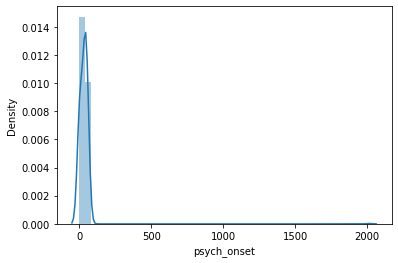

In [ ]:
sns.distplot(df_num['psych_onset']) ## hacer un count de cada valor de cada variable

In [ ]:
# hay dos valores atípicos en la columna psych_onset, los elimino
df_num.drop(df_num[df_num.psych_onset == 2007].index, inplace=True) 

In [ ]:
df_num.drop(df_num[df_num.psych_onset == 2011].index, inplace=True) 

In [ ]:
df_num.shape

(1517, 68)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


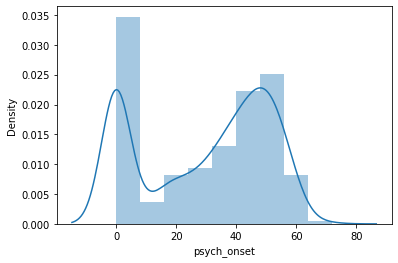

In [ ]:
# distribucion de psych_onset sin valores atipicos, hay bastante cero por los espacios vacios 
sns.distplot(df_num['psych_onset']) ## espacios vacios quitarlos de 

In [ ]:
# la "cola" de la distribución apunta hacia la izquierda producen un valor de asimetría negativo
print("Asimetria de la variable psych_onset es: {}".format(df_num['psych_onset'].skew()))

Asimetria de la variable psych_onset es: -0.3067417120971298


In [ ]:
# Matriz de correlación
# ==============================================================================
corr_matrix = df_num.corr(method='pearson')
corr_matrix

,psych_onset,D2_KL_RW_t1,CVLT_LS_DG1_5_RW1,CVLT_VFWI_RW1,CVLT_WAI_RW1,CVLT_VFWII_RW1,CVLT_WAII_RW1,FWIT_FWL1,FWIT_FSB1,FWIT_INT1,...,RR_dia,HDL365_t1,LDL366_t1,TG367_t1,CRh393_t1,IL6457_t1,BDI_sum_t2R,Tryptophan_t1,Kynurenine_t1,Kyn_Trp_t1
psych_onset,1.000000,0.136085,0.133722,0.114487,0.112597,0.113055,0.108019,0.086917,0.106747,0.134659,...,0.221583,0.177290,0.245280,0.159867,0.065668,0.038159,0.046623,0.102966,0.108121,0.102472
D2_KL_RW_t1,0.136085,1.000000,0.743848,0.679512,0.657365,0.680752,0.651698,0.165529,0.230458,0.273474,...,0.299772,0.331640,0.311227,0.115154,0.030947,0.013502,0.107930,0.109560,0.082143,0.074012
CVLT_LS_DG1_5_RW1,0.133722,0.743848,1.000000,0.918759,0.852895,0.890052,0.822126,0.209942,0.288531,0.353458,...,0.324778,0.400828,0.339269,0.153707,0.078094,0.057765,0.159151,0.044018,0.029857,0.032667
CVLT_VFWI_RW1,0.114487,0.679512,0.918759,1.000000,0.860596,0.913741,0.817432,0.174775,0.239221,0.290835,...,0.277565,0.373073,0.298348,0.112604,0.067283,0.037516,0.153582,0.056213,0.042941,0.048169
CVLT_WAI_RW1,0.112597,0.657365,0.852895,0.860596,1.000000,0.836823,0.931123,0.245069,0.333910,0.415436,...,0.283225,0.374259,0.290956,0.107196,0.077956,0.057765,0.163942,0.122153,0.106023,0.111185
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
IL6457_t1,0.038159,0.013502,0.057765,0.037516,0.057765,0.035975,0.051996,0.055384,0.067694,0.073196,...,0.106403,0.010104,0.091959,0.136608,0.393034,1.000000,0.029933,0.003241,0.030028,0.042093
BDI_sum_t2R,0.046623,0.107930,0.159151,0.153582,0.163942,0.126005,0.137007,0.068049,0.089763,0.132360,...,0.096133,0.056107,0.059278,0.070059,0.103219,0.029933,1.000000,-0.058916,-0.053801,-0.040551
Tryptophan_t1,0.102966,0.109560,0.044018,0.056213,0.122153,0.066184,0.126221,0.045643,0.076880,0.127899,...,0.071915,0.088741,0.124348,0.093900,0.030278,0.003241,-0.058916,1.000000,0.950342,0.920650
Kynurenine_t1,0.108121,0.082143,0.029857,0.042941,0.106023,0.057453,0.115838,0.040425,0.071618,0.122152,...,0.069775,0.076754,0.121815,0.091610,0.075954,0.030028,-0.053801,0.950342,1.000000,0.982532


In [ ]:
# variables numericas
#datos_num = df_bh.select_dtypes(include=['float64', 'int'])
#datos_num.head(10)

In [ ]:
print("Shape: ",df_num.shape)
print("Tipo de datos: ",df_num.dtypes)

Shape:  (1517, 68)
Tipo de datos:  psych_onset            int64
D2_KL_RW_t1          float64
CVLT_LS_DG1_5_RW1      int64
CVLT_VFWI_RW1          int64
CVLT_WAI_RW1           int64
                      ...   
IL6457_t1            float64
BDI_sum_t2R            int64
Tryptophan_t1        float64
Kynurenine_t1        float64
Kyn_Trp_t1           float64
Length: 68, dtype: object


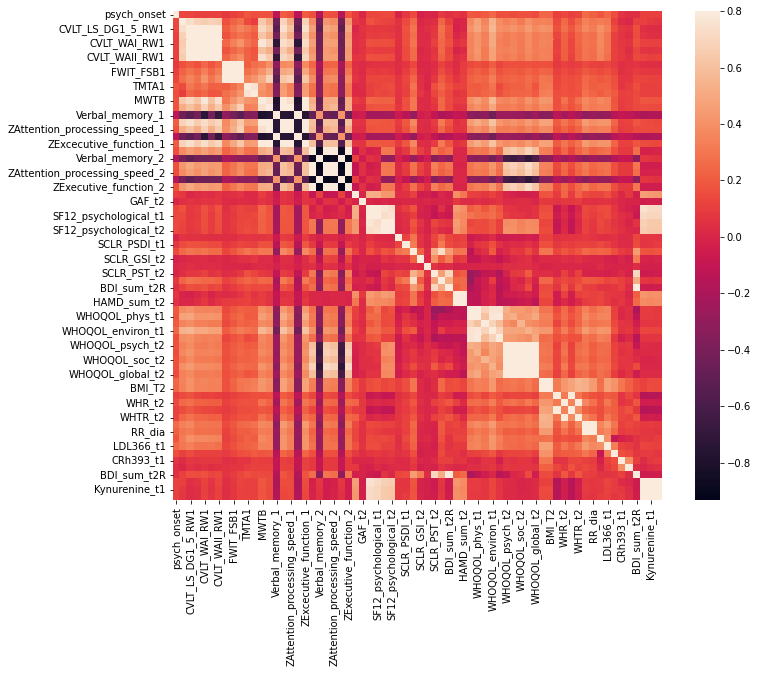

In [ ]:
corrmat = df_num.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True);

In [ ]:
# Matriz de correlación
#k = 10 # Número de variables.
#cols = corrmat.nlargest(k, 'psych_onset')['psych_onset'].index
#cm = np.corrcoef(df_bh[cols].values.T)
#sns.set(font_scale = 1.25)
#hm = sns.heatmap(cm, cbar = True, annot = True, square = True, fmt = '.2f', annot_kws = {'size': 10}, yticklabels = cols.values, xticklabels = cols.values)
#plt.show()

In [ ]:
print (corrmat['psych_onset'].sort_values(ascending=False)[:20], '\n') #top 20 valores
print ('----------------------')
print (corrmat['psych_onset'].sort_values(ascending=False)[-5:]) #ultimos 5 valores

psych_onset                      1.000000
RR_sys                           0.259279
LDL366_t1                        0.245280
WHOQOL_environ_t1                0.241047
BMI_T1                           0.238160
BMI_T2                           0.237328
RR_dia                           0.221583
ZExcecutive_function_1           0.208615
Excecutive_function_1            0.208614
WHOQOL_soc_t1                    0.199192
WHOQOL_psych_t1                  0.194909
TMTA1                            0.189319
WHOQOL_phys_t1                   0.182959
HDL365_t1                        0.177290
MWTB                             0.176885
ZExecutive_function_2            0.172610
Executive_function_2             0.172607
ZAttention_processing_speed_1    0.170650
Attention_processing_speed_1     0.170646
WHOQOL_environ_t2                0.168599
Name: psych_onset, dtype: float64 

----------------------
SCLR_GSI_t2        -0.013089
Verbal_memory_1    -0.130257
ZVerbal_memory_1   -0.130263
Verbal_memory_

In [ ]:
# valores unicos de psych_onset
df_num['psych_onset'].unique()

array([55, 24, 48, 53, 71, 40, 49,  0, 54, 45, 29, 50, 30, 57, 38, 51, 17,
       35, 41, 18, 15, 47, 52, 32, 43, 12, 60, 23, 56, 27, 22, 34, 44, 20,
       25, 59, 39, 14, 19, 46, 58, 37, 33, 26, 66,  9, 28,  6, 16,  5, 42,
       21, 11,  7, 31, 10, 36, 13,  8, 61, 69, 67, 72,  3, 62])

In [ ]:
#Aqui creo un dataframe para ver la mediana de las sietes primeras variables mas correladas
df1=df_num.groupby(['psych_onset'])['psych_onset'].count()
df2=df_num.groupby(['psych_onset'])['RR_sys','LDL366_t1','WHOQOL_environ_t1','BMI_T1','BMI_T2','RR_dia','ZExcecutive_function_1'].median()
df_summary=pd.concat([df1, df2],axis=1)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  This is separate from the ipykernel package so we can avoid doing imports until


In [ ]:
df_summary

,psych_onset,RR_sys,LDL366_t1,WHOQOL_environ_t1,BMI_T1,BMI_T2,RR_dia,ZExcecutive_function_1
psych_onset,,,,,,,,
0,411,133.0,132.0,71.0,24.920,24.680,83.0,0.395774
3,1,134.0,129.0,59.0,19.170,19.730,86.0,0.384705
5,5,130.0,146.0,69.0,27.380,26.200,80.0,0.400304
6,1,149.0,121.0,41.0,30.550,30.550,98.0,0.400311
7,3,130.0,125.0,47.0,30.510,29.640,80.0,0.397055
...,...,...,...,...,...,...,...,...
66,2,154.0,165.0,72.0,27.585,27.325,87.0,0.394135
67,1,182.0,164.0,75.0,25.410,26.000,103.0,0.397758
69,1,189.0,186.0,91.0,24.170,24.050,100.0,0.400561


La tabla de correlaciones junto con la variable psych_onset, muestra una algunas correlaciones importantes 

In [ ]:
tabla = df_num[['psych_onset', 'RR_sys','LDL366_t1','WHOQOL_environ_t1','BMI_T1','BMI_T2','RR_dia','ZExcecutive_function_1']].groupby(['psych_onset'], as_index=False).agg(['mean','count'])
tabla

RR_sys         LDL366_t1       WHOQOL_environ_t1        \
                   mean count        mean count              mean count   
psych_onset                                                               
0            108.744526   411  116.216545   411         58.467153   411   
3            134.000000     1  129.000000     1         59.000000     1   
5            132.600000     5  146.800000     5         72.600000     5   
6            149.000000     1  121.000000     1         41.000000     1   
7             90.000000     3  113.000000     3         51.000000     3   
...                 ...   ...         ...   ...               ...   ...   
66           154.000000     2  165.000000     2         72.000000     2   
67           182.000000     1  164.000000     1         75.000000     1   
69           189.000000     1  186.000000     1         91.000000     1   
71           118.000000     1  148.000000     1         91.000000     1   
72           133.000000     1  169.000000     1         84.000000     1   

                BMI_T1           BMI_T2            RR_dia        \
                  mean count       mean count        mean count   
psych_onset                                                       
0            21.563942   411  21.244015   411   67.656934   411   
3            19.170000     1  19.730000     1   86.000000     1   
5            26.056000     5  25.556000     5   86.400000     5   
6            30.550000     1  30.550000     1   98.000000     1   
7            29.870000     3  29.686667     3   55.333333     3   
...                ...   ...        ...   ...         ...   ...   
66           27.585000     2  27.325000     2   87.000000     2   
67           25.410000     1  26.000000     1  103.000000     1   
69           24.170000     1  24.050000     1  100.000000     1   
71           28.630000     1  28.630000     1   77.000000     1   
72           24.790000     1  24.830000     1   84.000000     1   

            ZExcecutive_function_1        
                              mean count  
psych_onset                               
0                        -0.396239   411  
3                         0.384705     1  
5                         0.399508     5  
6                         0.400311     1  
7                         0.376913     3  
...                            ...   ...  
66                        0.394135     2  
67                        0.397758     1  
69                        0.400561     1  
71                        0.396087     1  
72                       -1.110950     1  

[65 rows x 14 columns]

In [ ]:
tabla2 = df_num[['psych_onset','Excecutive_function_1','WHOQOL_soc_t1','WHOQOL_psych_t1','TMTA1','WHOQOL_phys_t1','HDL365_t1' ]].groupby(['psych_onset'], as_index=False).agg(['mean','count'])
tabla2

Excecutive_function_1       WHOQOL_soc_t1       WHOQOL_psych_t1  \
                             mean count          mean count            mean   
psych_onset                                                                   
0                       -0.737541   411     45.708029   411       39.892944   
3                        0.715576     1     67.000000     1       38.000000   
5                        0.743121     5     50.200000     5       41.600000   
6                        0.744614     1     25.000000     1       29.000000   
7                        0.701077     3     27.666667     3       33.333333   
...                           ...   ...           ...   ...             ...   
66                       0.733123     2     75.000000     2       52.000000   
67                       0.739864     1     42.000000     1       58.000000   
69                       0.745080     1     42.000000     1       58.000000   
71                       0.736756     1     75.000000     1       46.000000   
72                      -2.067428     1     83.000000     1       54.000000   

                       TMTA1       WHOQOL_phys_t1        HDL365_t1        
            count       mean count           mean count       mean count  
psych_onset                                                               
0             411  23.895036   411      46.793187   411  45.914842   411  
3               1  41.070000     1      57.000000     1  54.000000     1  
5               5  29.154000     5      61.600000     5  62.000000     5  
6               1  19.600000     1      50.000000     1  46.000000     1  
7               3  40.986667     3      55.000000     3  60.333333     3  
...           ...        ...   ...            ...   ...        ...   ...  
66              2  39.870000     2      61.000000     2  45.500000     2  
67              1  32.870000     1      68.000000     1  49.000000     1  
69              1  25.000000     1      82.000000     1  65.000000     1  
71              1  37.100000     1      57.000000     1  68.000000     1  
72              1  48.200000     1      71.000000     1  59.000000     1  

[65 rows x 12 columns]

In [ ]:
# variable RR_sys
pivot = df_num.pivot_table(index='RR_sys', values='psych_onset', aggfunc=np.mean)
pivot

,psych_onset
RR_sys,
0,12.753731
90,0.000000
98,49.000000
99,35.000000
100,16.714286
...,...
198,48.000000
200,0.000000
206,0.000000


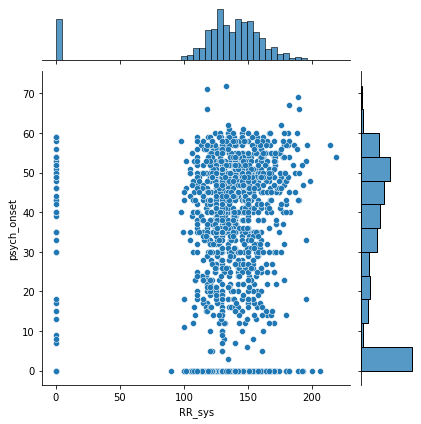

In [ ]:
sns.jointplot(x=df_num['RR_sys'], y=df_num['psych_onset'])
# los valores son constantes despues del 0 entre 100 y 200, la columna cob valor cero muestra bastantes valores por la cantidad qde ceros que tiene  psych_onset
# RR_sys es la presion sanguinea por lo que la mayoria de valores estan entre 100 y 200, por ejemplo no hay nadie con presion sanguinea de 200
# ejemplo el valor promedio de la edad psych_onset es de 48 años con 198 de presion
# 

In [ ]:
# variable LDL366_t1
pivot2 = df_num.pivot_table(index='LDL366_t1', values='psych_onset', aggfunc=np.mean)
pivot2

,psych_onset
LDL366_t1,
0,0.571429
31,35.000000
39,46.000000
42,41.000000
43,12.000000
...,...
267,59.000000
270,26.000000
279,56.000000


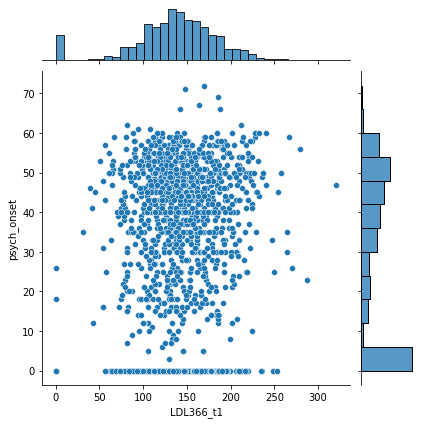

In [ ]:
sns.jointplot(x=df_num['LDL366_t1'], y=df_num['psych_onset'])
# la variable LDL366_t1 indica la densidad baja de lipoproteina hay algunos valores atipicos en las edades mas pequeñas y altas 
# 

In [ ]:
# variable WHOQOL_environ_t1
pivot3 = df_num.pivot_table(index='WHOQOL_environ_t1', values='psych_onset', aggfunc=np.mean)
pivot3

,psych_onset
WHOQOL_environ_t1,
0,12.618321
19,32.000000
25,21.000000
28,0.000000
31,33.000000
34,7.666667
38,34.250000
41,24.000000
44,31.750000


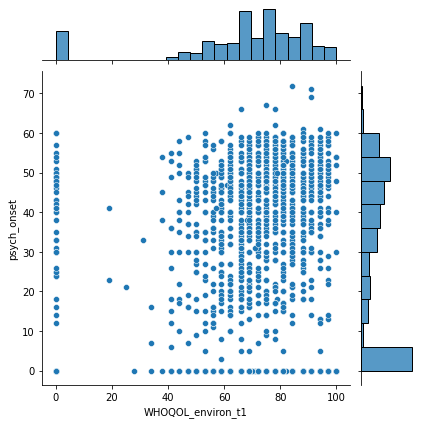

In [ ]:
sns.jointplot(x=df_num['WHOQOL_environ_t1'], y=df_num['psych_onset'])
# esta variable indica el nivel de (Calidad de vida) salud física t1
# los niveles pueden estar en cualquier edad

In [ ]:
# variable BMI_T1
pivot4 = df_num.pivot_table(index='BMI_T1', values='psych_onset', aggfunc=np.mean)
pivot4

,psych_onset
BMI_T1,
0.00,6.239583
15.24,39.000000
16.65,42.000000
17.22,51.000000
17.37,50.000000
...,...
47.05,43.000000
48.42,49.000000
50.73,0.000000


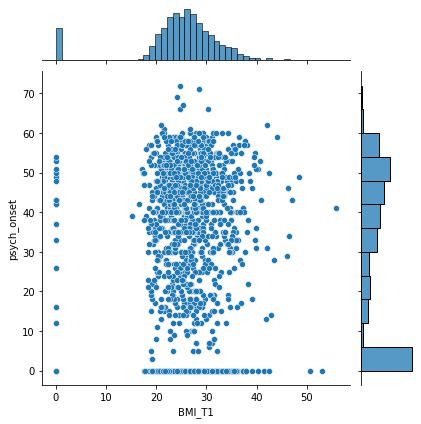

In [ ]:
sns.jointplot(x=df_num['BMI_T1'], y=df_num['psych_onset'])
# esta variable indica el Índice de masa corporal, no hay una tendencia en los datos ya que este indice es variable entre la gente
# pero si que despues de los 2 años hay valores altos

In [ ]:
# variable BMI_T2
pivot5 = df_num.pivot_table(index='BMI_T2', values='psych_onset', aggfunc=np.mean)
pivot5

,psych_onset
BMI_T2,
0.00,7.138614
15.24,39.000000
16.92,42.000000
17.16,51.000000
17.22,50.000000
...,...
46.62,43.000000
46.75,49.000000
47.11,0.000000


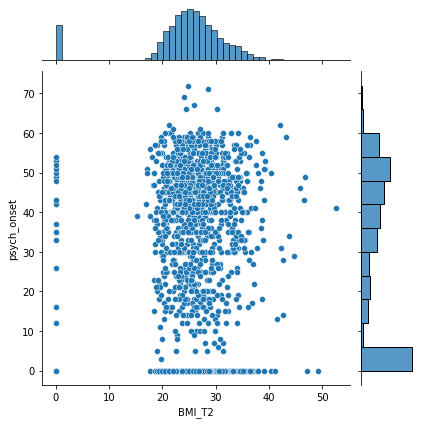

In [ ]:
sns.jointplot(x=df_num['BMI_T2'], y=df_num['psych_onset'])
# esta variable indica el Índice de masa corporal, igual que la variable anterior no hay una tendencia en los datos ya que este indice es variable entre la gente
# Somatic health variables

In [ ]:
# variable RR_dia
pivot5 = df_num.pivot_table(index='RR_dia', values='psych_onset', aggfunc=np.mean)
pivot5

,psych_onset
RR_dia,
0,12.753731
55,40.000000
60,16.333333
61,11.000000
62,26.750000
...,...
126,52.000000
129,39.500000
136,50.000000


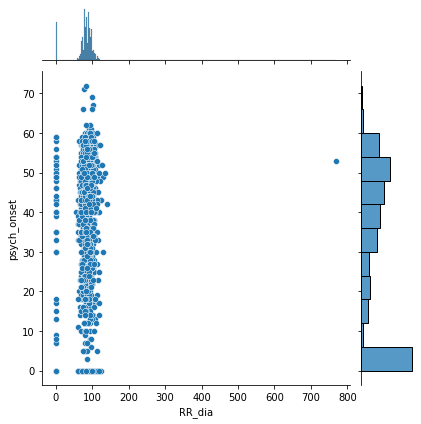

In [ ]:
sns.jointplot(x=df_num['RR_dia'], y=df_num['psych_onset'])
# Esta variable tambien indica presion sanguinea
#  outlier

In [ ]:
df_num.describe()

,psych_onset,D2_KL_RW_t1,CVLT_LS_DG1_5_RW1,CVLT_VFWI_RW1,CVLT_WAI_RW1,CVLT_VFWII_RW1,CVLT_WAII_RW1,FWIT_FWL1,FWIT_FSB1,FWIT_INT1,...,RR_dia,HDL365_t1,LDL366_t1,TG367_t1,CRh393_t1,IL6457_t1,BDI_sum_t2R,Tryptophan_t1,Kynurenine_t1,Kyn_Trp_t1
count,1517.000000,1517.000000,1517.000000,1517.000000,1517.000000,1517.000000,1517.000000,1517.000000,1517.000000,1517.000000,...,1517.000000,1517.000000,1517.000000,1517.000000,1517.000000,1517.000000,1517.000000,1517.000000,1517.000000,1517.000000
mean,29.553724,114.782136,49.078444,10.070534,10.480554,10.346078,10.420567,27.205939,40.462835,66.734601,...,80.317073,52.132498,136.574819,130.721160,2.494146,2.744806,8.311800,30.175544,0.878332,0.013608
std,21.219497,51.437472,19.666341,4.603074,4.777412,4.839462,5.005912,28.380561,31.528244,41.534981,...,32.449011,19.317346,49.160356,82.343139,3.653403,3.760997,10.050647,32.952877,0.999377,0.015426
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,101.000000,43.000000,8.000000,9.000000,8.000000,8.000000,25.150000,37.300000,60.100000,...,78.000000,41.000000,113.000000,85.000000,0.600000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,35.000000,124.000000,54.000000,11.000000,12.000000,12.000000,12.000000,29.290000,44.430000,72.660000,...,85.000000,52.000000,139.000000,112.000000,1.300000,2.250000,4.000000,0.000000,0.000000,0.000000
75%,48.000000,145.000000,62.000000,13.000000,14.000000,14.000000,14.000000,33.400000,50.770000,84.560000,...,94.000000,64.000000,167.000000,160.000000,2.800000,3.490000,13.000000,64.300000,1.770000,0.027432
max,72.000000,266.000000,81.000000,17.000000,17.000000,17.000000,16.000000,999.000000,999.000000,999.000000,...,770.000000,119.000000,321.000000,1277.000000,54.200000,78.510000,53.000000,116.800000,4.780000,0.076849


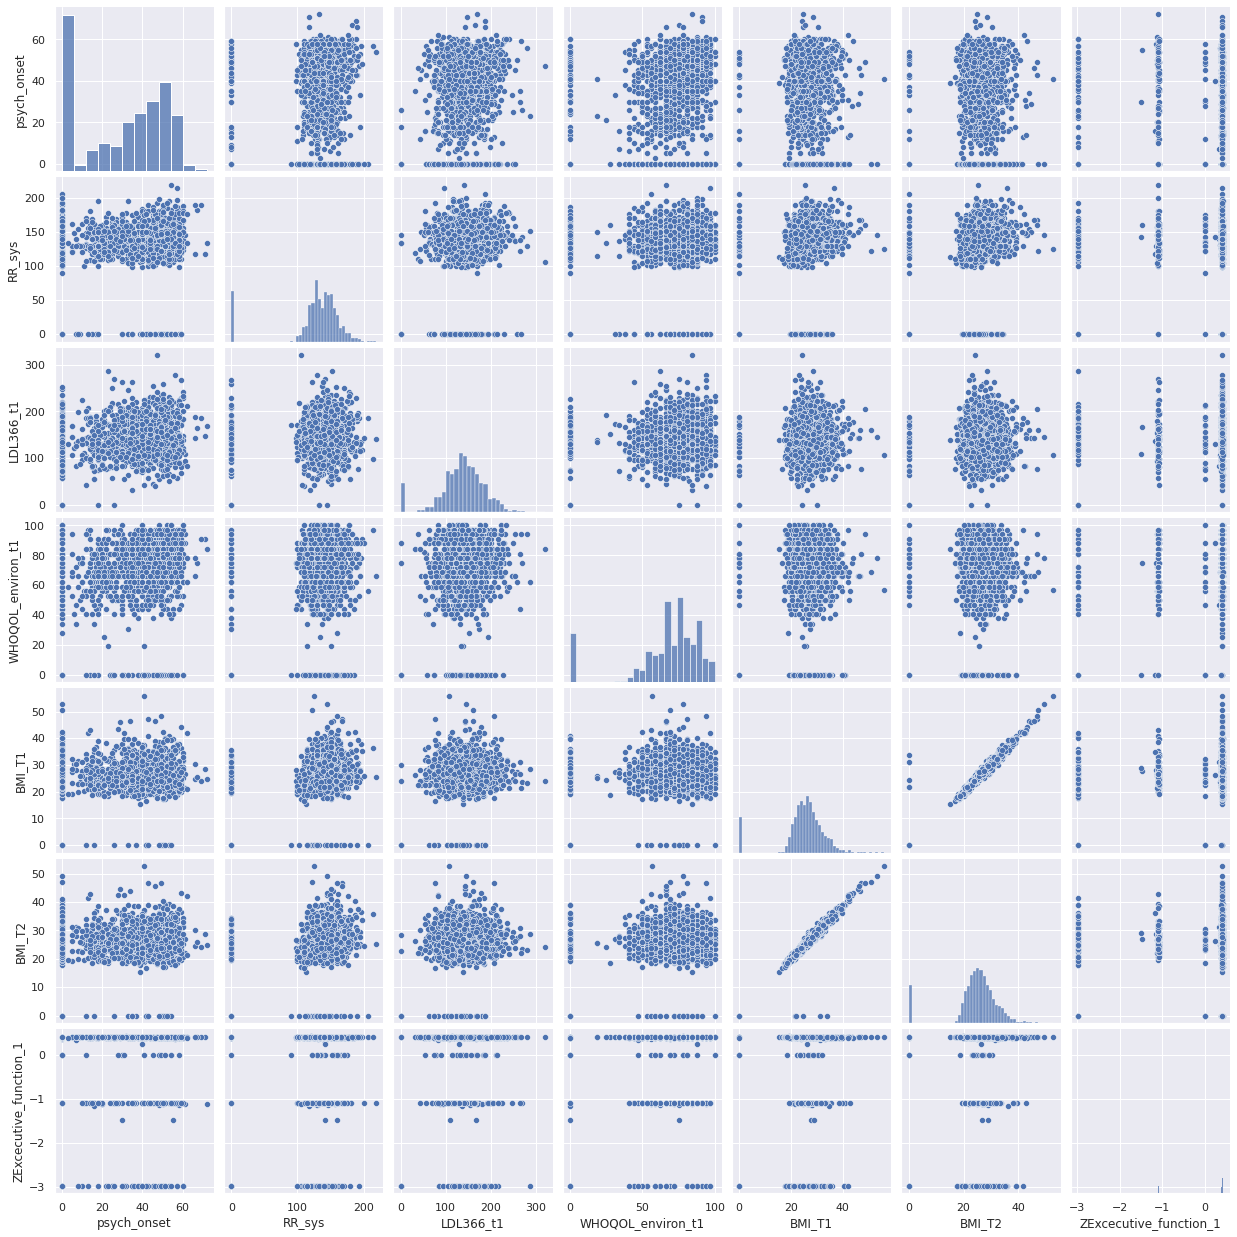

In [ ]:
# Scatter plot entre las 5 primeras variables mas correladas:

sns.set()
cols = ['psych_onset', 'RR_sys','LDL366_t1','WHOQOL_environ_t1','BMI_T1','BMI_T2', 'ZExcecutive_function_1']
sns.pairplot(df_num[cols], height = 2.5)
plt.show();



1.   La mayoria de datos son uniformes no hay tendencias entre variables excepto por los indices de masa corporal 



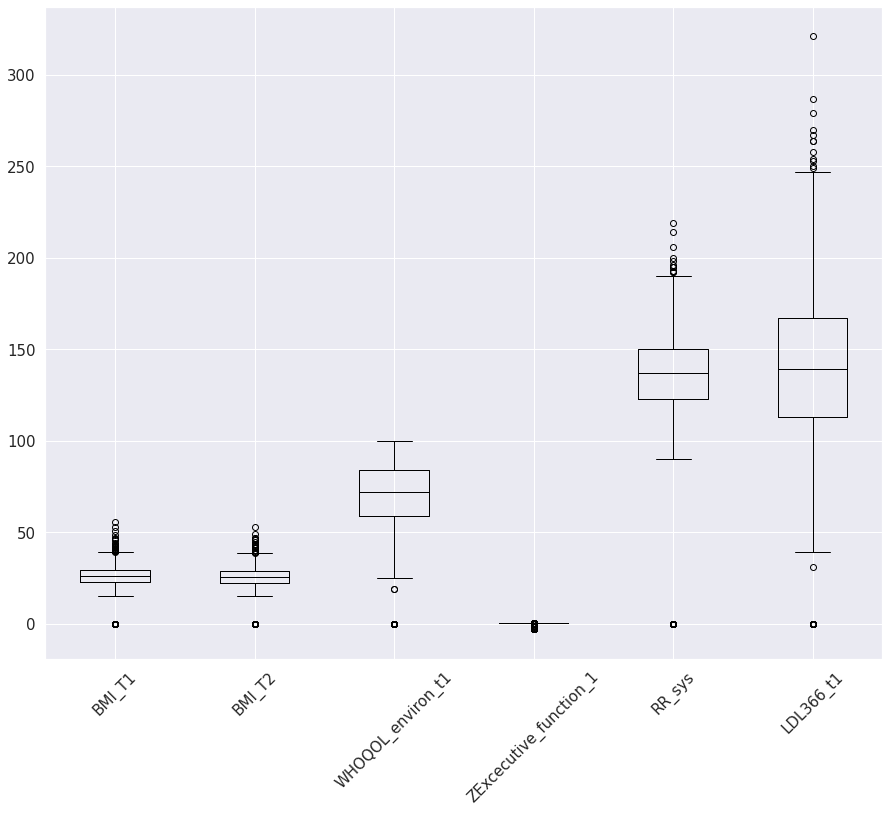

In [ ]:
# diagrama boxplot para identificar outliers dataframe df_num
df_num.boxplot(column=['BMI_T1', 'BMI_T2','WHOQOL_environ_t1', 'ZExcecutive_function_1','RR_sys','LDL366_t1'], grid=True, color='black', rot=45, fontsize=15, figsize=(15,12) )

En la siguiente celda estoy asignando un dataframe con todas la variables numericas que tenemos para el estudio junto con la variable number_treatments

In [ ]:
# todas las variables son numericas number_treatments
df_num_2 = df_bh[['number_treatments','D2_KL_RW_t1', 'CVLT_LS_DG1_5_RW1', 'CVLT_VFWI_RW1','CVLT_WAI_RW1', 'CVLT_VFWII_RW1', 'CVLT_WAII_RW1',
 'FWIT_FWL1', 'FWIT_FSB1', 'FWIT_INT1', 'TMTA1', 'TMTB1', 'MWTB','Attention_processing_speed_1','Verbal_memory_1','Excecutive_function_1','ZAttention_processing_speed_1',
'ZVerbal_memory_1','ZExcecutive_function_1','Attention_processing_speed_2','Verbal_memory_2','Executive_function_2',
'ZAttention_processing_speed_2','ZVerbal_memory_2','ZExecutive_function_2','GAF_t1','GAF_t2','SF12_physical_t1','SF12_psychological_t1','SF12_physical_t2','SF12_psychological_t2',
'SCLR_GSI_t1','SCLR_PSDI_t1','SCLR_PST_t1','SCLR_GSI_t2','SCLR_PSDI_t2','SCLR_PST_t2','BDI_sum_t1R','BDI_sum_t2R','HAMD_sum_t1',
'HAMD_sum_t2','WHOQOL_psych_t1','WHOQOL_phys_t1','WHOQOL_soc_t1','WHOQOL_environ_t1','WHOQOL_global_t1','WHOQOL_psych_t2',
'WHOQOL_phys_t2','WHOQOL_soc_t2','WHOQOL_environ_t2','WHOQOL_global_t2','BMI_T1','BMI_T2','WHR_t1','WHR_t2','WHTR_t1','WHTR_t2','RR_sys','RR_dia','HDL365_t1','LDL366_t1','TG367_t1',
'CRh393_t1','IL6457_t1','BDI_sum_t2R','Tryptophan_t1','Kynurenine_t1','Kyn_Trp_t1']]

In [ ]:
df_num_2.head()

,number_treatments,D2_KL_RW_t1,CVLT_LS_DG1_5_RW1,CVLT_VFWI_RW1,CVLT_WAI_RW1,CVLT_VFWII_RW1,CVLT_WAII_RW1,FWIT_FWL1,FWIT_FSB1,FWIT_INT1,...,RR_dia,HDL365_t1,LDL366_t1,TG367_t1,CRh393_t1,IL6457_t1,BDI_sum_t2R,Tryptophan_t1,Kynurenine_t1,Kyn_Trp_t1
0,0,92.0,57,13,14,13,15,30.7,45.9,73.1,...,85,52,150,136,3.0,1.63,16,66.2,1.99,0.030060
1,0,117.0,55,9,9,10,10,25.4,41.2,61.0,...,70,57,127,100,0.7,0.00,9999,57.6,1.53,0.026562
2,1,126.0,43,7,7,8,9,32.7,40.4,73.6,...,95,35,186,137,16.2,6.56,10,57.1,2.24,0.039229
3,0,130.0,54,13,12,11,12,30.9,52.7,72.5,...,93,47,140,111,0.5,1.92,16,68.1,1.55,0.022761
4,0,146.0,51,10,15,14,14,36.8,45.4,77.6,...,77,68,148,115,9.4,2.38,9999,60.5,2.42,0.040000


In [ ]:
por_9999_2 = df_num_2[df_num_2['number_treatments'] == 9999]
por_9999_2.head()

,number_treatments,D2_KL_RW_t1,CVLT_LS_DG1_5_RW1,CVLT_VFWI_RW1,CVLT_WAI_RW1,CVLT_VFWII_RW1,CVLT_WAII_RW1,FWIT_FWL1,FWIT_FSB1,FWIT_INT1,...,RR_dia,HDL365_t1,LDL366_t1,TG367_t1,CRh393_t1,IL6457_t1,BDI_sum_t2R,Tryptophan_t1,Kynurenine_t1,Kyn_Trp_t1
33,9999,9999.0,9999,9999,9999,9999,9999,9999.0,9999.0,9999.0,...,9999,9999,9999,9999,9999.0,9999.0,9999,9999.0,9999.00,0.000000
103,9999,9999.0,9999,9999,9999,9999,9999,9999.0,9999.0,9999.0,...,9999,9999,9999,9999,9999.0,9999.0,9999,9999.0,9999.00,0.000000
121,9999,9999.0,9999,9999,9999,9999,9999,9999.0,9999.0,9999.0,...,9999,9999,9999,9999,9999.0,9999.0,9999,60.6,1.46,0.024092
179,9999,9999.0,9999,9999,9999,9999,9999,9999.0,9999.0,9999.0,...,9999,9999,9999,9999,9999.0,9999.0,9999,60.6,1.51,0.024917
225,9999,9999.0,9999,9999,9999,9999,9999,9999.0,9999.0,9999.0,...,9999,9999,9999,9999,9999.0,9999.0,9999,9999.0,9999.00,0.000000


In [ ]:
freq = df_num_2.groupby(['number_treatments']).count() 
print(freq)

                   D2_KL_RW_t1  CVLT_LS_DG1_5_RW1  CVLT_VFWI_RW1  \
number_treatments                                                  
0                         1048               1048           1048   
1                          226                226            226   
2                           76                 76             76   
3                           36                 36             36   
4                           20                 20             20   
5                           13                 13             13   
6                            4                  4              4   
7                            3                  3              3   
8                            4                  4              4   
9                            2                  2              2   
10                           8                  8              8   
11                           1                  1              1   
12                           1                  

In [ ]:
print("En la columna 'number_treatments' El numero 9999 se repite {} veces".format(
      df_num_2[df_num_2['number_treatments'] == 9999]['number_treatments'].count() ))

En la columna 'number_treatments' El numero 9999 se repite 74 veces


0       1048
1        226
2         76
9999      74
3         36
4         20
5         13
10         8
6          4
8          4
7          3
9          2
12         1
15         1
11         1
13         1
20         1
Name: number_treatments, dtype: int64


Text(0.5, 1.0, 'Distribucion en la columna objetivo')

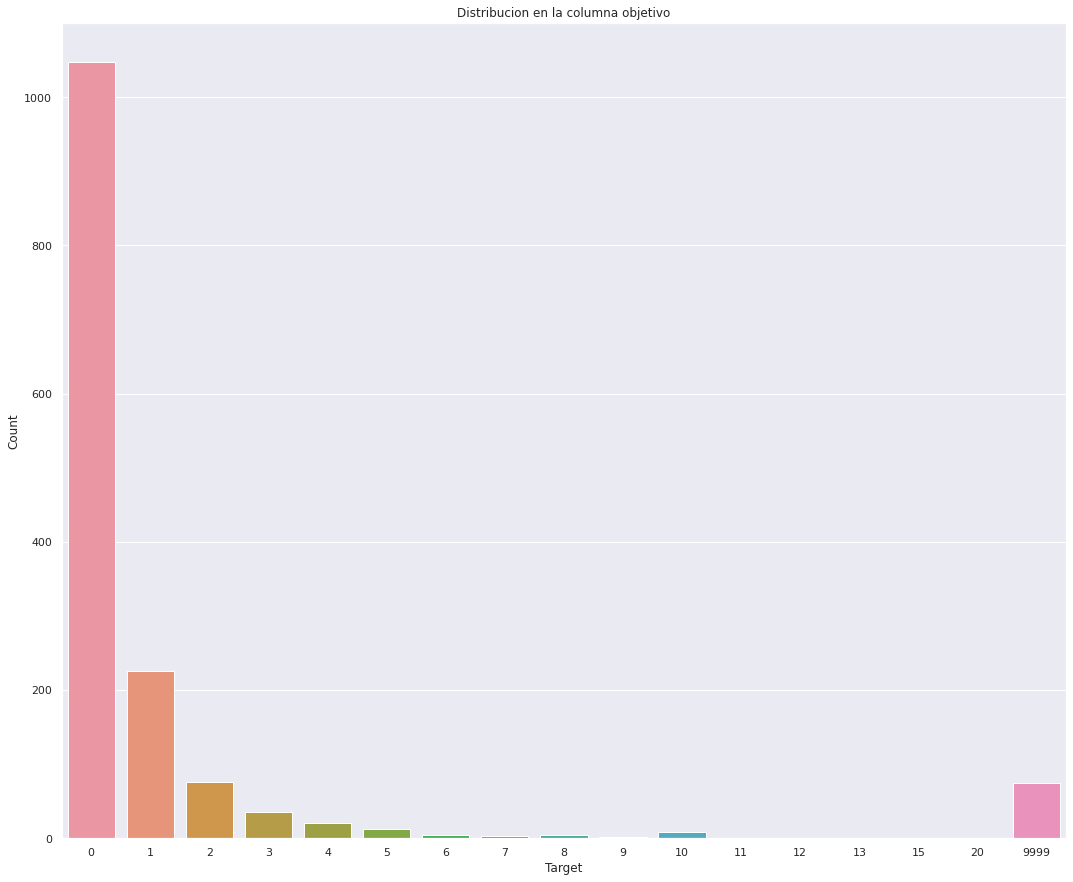

In [ ]:
print(df_num_2['number_treatments'].value_counts())
plt.figure(figsize = (18,15))
sns.countplot(x = df_num_2['number_treatments'])
plt.xlabel('Target', size = 12)
plt.ylabel('Count', size = 12)
plt.title('Distribucion en la columna objetivo', size = 12)

In [ ]:
# me tocó reemplazar 9999 con 0 ese valor con 9999 no es correcto, lo reemplazo en todo el dataframe df_num_2
df_num_2= df_num_2.replace([9999],0)

In [ ]:
# me tocó reemplazar 9999 con 0 ese valor con 9999 no es correcto
df_num_2= df_num_2.replace([9999],0)

In [ ]:
df_num_2.head()

,number_treatments,D2_KL_RW_t1,CVLT_LS_DG1_5_RW1,CVLT_VFWI_RW1,CVLT_WAI_RW1,CVLT_VFWII_RW1,CVLT_WAII_RW1,FWIT_FWL1,FWIT_FSB1,FWIT_INT1,...,RR_dia,HDL365_t1,LDL366_t1,TG367_t1,CRh393_t1,IL6457_t1,BDI_sum_t2R,Tryptophan_t1,Kynurenine_t1,Kyn_Trp_t1
0,0,92.0,57,13,14,13,15,30.7,45.9,73.1,...,85,52,150,136,3.0,1.63,16,66.2,1.99,0.030060
1,0,117.0,55,9,9,10,10,25.4,41.2,61.0,...,70,57,127,100,0.7,0.00,0,57.6,1.53,0.026562
2,1,126.0,43,7,7,8,9,32.7,40.4,73.6,...,95,35,186,137,16.2,6.56,10,57.1,2.24,0.039229
3,0,130.0,54,13,12,11,12,30.9,52.7,72.5,...,93,47,140,111,0.5,1.92,16,68.1,1.55,0.022761
4,0,146.0,51,10,15,14,14,36.8,45.4,77.6,...,77,68,148,115,9.4,2.38,0,60.5,2.42,0.040000


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


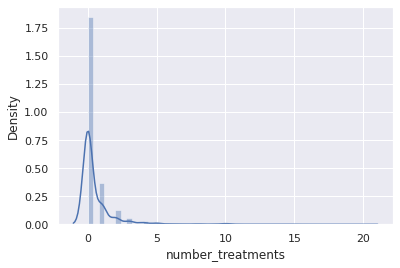

In [ ]:
sns.distplot(df_num_2['number_treatments'])

In [ ]:
df_num_2['number_treatments'].max()

20

In [ ]:
# la "cola" de la distribución apunta hacia la izquierda producen un valor de asimetría positivo
print("Asimetria de la variable number_treatments es: {}".format(df_num_2['number_treatments'].skew()))

Asimetria de la variable number_treatments es: 5.19293380427729


In [ ]:
# Matriz de correlación
# ==============================================================================
corr_matrix_2 = df_num_2.corr(method='pearson')
corr_matrix_2

,number_treatments,D2_KL_RW_t1,CVLT_LS_DG1_5_RW1,CVLT_VFWI_RW1,CVLT_WAI_RW1,CVLT_VFWII_RW1,CVLT_WAII_RW1,FWIT_FWL1,FWIT_FSB1,FWIT_INT1,...,RR_dia,HDL365_t1,LDL366_t1,TG367_t1,CRh393_t1,IL6457_t1,BDI_sum_t2R,Tryptophan_t1,Kynurenine_t1,Kyn_Trp_t1
number_treatments,1.000000,-0.062150,-0.027771,-0.020606,-0.015895,-0.039445,-0.027547,0.009088,0.022967,0.042564,...,0.046675,0.026601,0.028425,0.077646,0.066974,0.107070,0.041963,0.060673,0.089206,0.108261
D2_KL_RW_t1,-0.062150,1.000000,0.743637,0.679317,0.657407,0.680772,0.651687,0.165513,0.230403,0.273273,...,0.299702,0.331463,0.310976,0.115454,0.030997,0.013398,0.108247,0.109997,0.082494,0.074402
CVLT_LS_DG1_5_RW1,-0.027771,0.743637,1.000000,0.918877,0.853014,0.890132,0.822319,0.209910,0.288656,0.353317,...,0.324842,0.402061,0.339080,0.153767,0.077664,0.057501,0.159820,0.044410,0.030039,0.032925
CVLT_VFWI_RW1,-0.020606,0.679317,0.918877,1.000000,0.860671,0.913760,0.817619,0.174789,0.239438,0.290837,...,0.277717,0.374420,0.298291,0.112593,0.066808,0.037291,0.154195,0.056421,0.042966,0.048259
CVLT_WAI_RW1,-0.015895,0.657407,0.853014,0.860671,1.000000,0.836980,0.931176,0.245040,0.333950,0.415238,...,0.283279,0.374981,0.290779,0.107427,0.077730,0.057559,0.164496,0.122550,0.106257,0.111477
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
IL6457_t1,0.107070,0.013398,0.057501,0.037291,0.057559,0.035778,0.051800,0.055372,0.067664,0.073205,...,0.106373,0.009849,0.091974,0.136465,0.392975,1.000000,0.029792,0.003087,0.029906,0.041950
BDI_sum_t2R,0.041963,0.108247,0.159820,0.154195,0.164496,0.126592,0.137563,0.068081,0.089846,0.132280,...,0.096205,0.056978,0.059185,0.070336,0.103119,0.029792,1.000000,-0.058373,-0.053422,-0.040130
Tryptophan_t1,0.060673,0.109997,0.044410,0.056421,0.122550,0.066633,0.126468,0.045564,0.076613,0.127363,...,0.071666,0.088497,0.123751,0.094636,0.030619,0.003087,-0.058373,1.000000,0.950366,0.920719
Kynurenine_t1,0.089206,0.082494,0.030039,0.042966,0.106257,0.057721,0.115929,0.040347,0.071351,0.121675,...,0.069525,0.076309,0.121288,0.092236,0.076269,0.029906,-0.053422,0.950366,1.000000,0.982544


In [ ]:
print("Shape: ",df_num_2.shape)
print("Tipo de datos: ",df_num_2.dtypes)

Shape:  (1519, 68)
Tipo de datos:  number_treatments      int64
D2_KL_RW_t1          float64
CVLT_LS_DG1_5_RW1      int64
CVLT_VFWI_RW1          int64
CVLT_WAI_RW1           int64
                      ...   
IL6457_t1            float64
BDI_sum_t2R            int64
Tryptophan_t1        float64
Kynurenine_t1        float64
Kyn_Trp_t1           float64
Length: 68, dtype: object


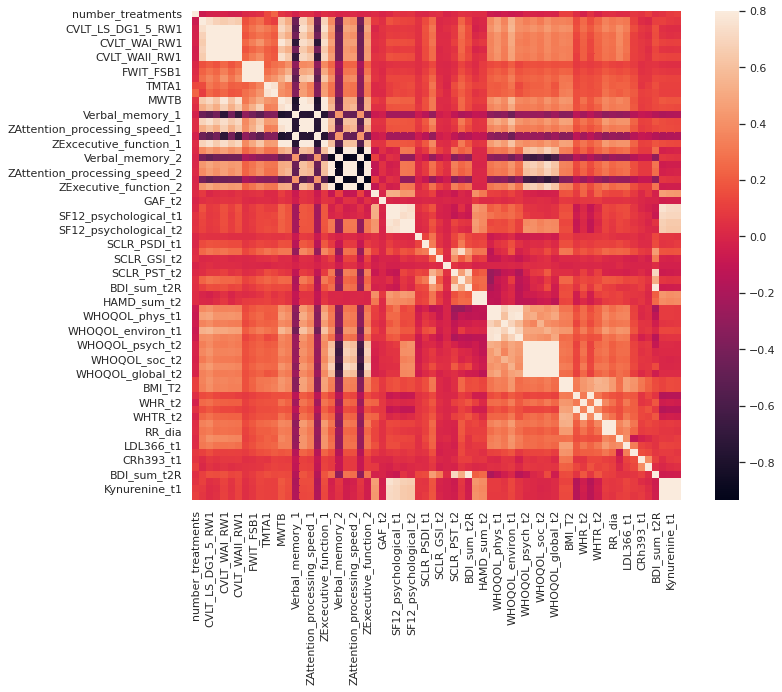

In [ ]:
corrmat2 = df_num_2.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat2, vmax=.8, square=True);

In [ ]:
print (corrmat2['number_treatments'].sort_values(ascending=False)[:20], '\n') #top 20 valores
print ('----------------------')
print (corrmat2['number_treatments'].sort_values(ascending=False)[-5:]) #ultimos 5 valores

number_treatments        1.000000
TMTB1                    0.236050
TMTA1                    0.136982
BMI_T2                   0.114777
Kyn_Trp_t1               0.108261
BMI_T1                   0.107202
IL6457_t1                0.107070
Kynurenine_t1            0.089206
TG367_t1                 0.077646
CRh393_t1                0.066974
Tryptophan_t1            0.060673
MWTB                     0.058058
SF12_psychological_t2    0.057582
SF12_psychological_t1    0.057328
SF12_physical_t2         0.054100
BDI_sum_t1R              0.052004
WHTR_t1                  0.050974
RR_dia                   0.046675
SCLR_GSI_t2              0.045890
FWIT_INT1                0.042564
Name: number_treatments, dtype: float64 

----------------------
WHOQOL_global_t1    -0.055447
WHOQOL_psych_t1     -0.060805
D2_KL_RW_t1         -0.062150
WHOQOL_environ_t1   -0.069502
WHOQOL_phys_t1      -0.074210
Name: number_treatments, dtype: float64


In [ ]:
# valores unicos de psych_onset
df_num_2['number_treatments'].unique()

array([ 0,  1,  4,  2,  3,  5, 12, 10,  9,  6, 15,  7,  8, 11, 13, 20])

**La tabla de correlaciones junto con la variable number_treatments, muestra una algunas correlaciones importantes**





In [ ]:
#Aqui creo un dataframe para ver la mediana de las sietes primeras variables mas correladas
df3=df_num_2.groupby(['number_treatments'])['number_treatments'].count()
df4=df_num_2.groupby(['number_treatments'])['TMTB1','TMTA1','BMI_T2','Kyn_Trp_t1','BMI_T1','IL6457_t1','Kynurenine_t1'].median()
df_summary=pd.concat([df3, df4],axis=1)
df_summary.head(10)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  This is separate from the ipykernel package so we can avoid doing imports until


,number_treatments,TMTB1,TMTA1,BMI_T2,Kyn_Trp_t1,BMI_T1,IL6457_t1,Kynurenine_t1
number_treatments,,,,,,,,
0,1122,59.900,28.125,25.290,0.000000,25.545,2.215,0.000
1,226,63.830,28.800,26.420,0.019730,26.690,2.180,1.190
2,76,74.860,36.450,26.650,0.019345,26.825,2.790,1.310
3,36,75.550,36.400,26.360,0.025192,26.550,2.770,1.505
4,20,66.500,31.950,27.150,0.025539,26.825,2.465,1.365
5,13,82.080,36.120,27.080,0.000000,27.140,2.420,0.000
6,4,72.635,11.540,24.415,0.016319,24.300,2.810,0.705
7,3,79.700,48.400,22.940,0.024830,22.510,6.470,1.460
8,4,108.075,47.005,29.330,0.011497,29.295,6.670,0.745


In [ ]:
tabla2_1 = df_num_2[['number_treatments', 'TMTB1','TMTA1','BMI_T2','Kyn_Trp_t1','BMI_T1','IL6457_t1','Kynurenine_t1']].groupby(['number_treatments'], as_index=False).agg(['mean','count'])
tabla2_1

TMTB1            TMTA1           BMI_T2        \
                         mean count       mean count       mean count   
number_treatments                                                       
0                   59.659857  1122  28.057816  1122  24.177968  1122   
1                   70.375531   226  32.150133   226  26.871372   226   
2                   77.930132    76  36.207895    76  26.553026    76   
3                   85.507222    36  38.397778    36  26.974722    36   
4                   75.803500    20  34.434000    20  27.417000    20   
5                   88.152308    13  33.011538    13  27.006923    13   
6                   68.537500     4  13.540000     4  24.215000     4   
7                   97.566667     3  51.966667     3  18.400000     3   
8                   97.987500     4  43.202500     4  31.177500     4   
9                   71.760000     2  30.800000     2  30.395000     2   
10                  71.903750     8  39.622500     8  30.530000     8   
11                  38.500000     1  29.000000     1  27.620000     1   
12                  94.000000     1  36.600000     1  24.290000     1   
13                  55.100000     1  23.400000     1  20.280000     1   
15                  89.500000     1  32.000000     1  32.920000     1   
20                 491.000000     1  78.160000     1  36.030000     1   

                  Kyn_Trp_t1           BMI_T1        IL6457_t1        \
                        mean count       mean count       mean count   
number_treatments                                                      
0                   0.012678  1122  24.552825  1122   2.628280  1122   
1                   0.015175   226  27.035664   226   2.733496   226   
2                   0.016217    76  26.821842    76   3.448816    76   
3                   0.019236    36  27.121389    36   2.788333    36   
4                   0.018668    20  27.531000    20   2.618000    20   
5                   0.007924    13  27.254615    13   2.453077    13   
6                   0.016698     4  24.087500     4   5.040000     4   
7                   0.023531     3  18.326667     3   5.380000     3   
8                   0.017524     4  31.230000     4   8.240000     4   
9                   0.021199     2  31.080000     2   2.785000     2   
10                  0.029720     8  30.811250     8   5.001250     8   
11                  0.024924     1  29.340000     1   2.860000     1   
12                  0.034161     1  25.030000     1  17.930000     1   
13                  0.031685     1  20.920000     1   5.790000     1   
15                  0.034918     1  32.920000     1   2.490000     1   
20                  0.000000     1  34.700000     1  11.160000     1   

                  Kynurenine_t1        
                           mean count  
number_treatments                      
0                      0.821319  1122  
1                      0.989204   226  
2                      1.060395    76  
3                      1.239722    36  
4                      1.100500    20  
5                      0.512308    13  
6                      0.770000     4  
7                      1.476667     3  
8                      0.840000     4  
9                      1.255000     2  
10                     1.682500     8  
11                     1.640000     1  
12                     2.890000     1  
13                     1.730000     1  
15                     1.910000     1  
20                     0.000000     1

In [ ]:
tabla2_2 = df_num_2[['number_treatments','TG367_t1','CRh393_t1','Tryptophan_t1','MWTB','SF12_psychological_t2']].groupby(['number_treatments'], as_index=False).agg(['mean','count'])
tabla2_2

TG367_t1       CRh393_t1       Tryptophan_t1        \
                         mean count      mean count          mean count   
number_treatments                                                         
0                  127.568627  1122  2.345045  1122     28.618093  1122   
1                  138.349558   226  2.799115   226     33.715929   226   
2                  140.223684    76  3.247368    76     34.447368    76   
3                  126.694444    36  2.577222    36     42.752778    36   
4                  130.500000    20  1.750000    20     35.395000    20   
5                  166.615385    13  2.869231    13     19.830769    13   
6                  107.500000     4  3.925000     4     23.025000     4   
7                  166.000000     3  2.200000     3     41.233333     3   
8                  184.250000     4  8.425000     4     26.125000     4   
9                  159.500000     2  3.500000     2     29.600000     2   
10                 130.000000     8  4.212500     8     43.275000     8   
11                 138.000000     1  2.000000     1     65.800000     1   
12                 253.000000     1  3.300000     1     84.600000     1   
13                  75.000000     1  1.600000     1     54.600000     1   
15                 452.000000     1  1.000000     1     54.700000     1   
20                 221.000000     1  5.800000     1      0.000000     1   

                        MWTB       SF12_psychological_t2        
                        mean count                  mean count  
number_treatments                                               
0                  25.729947  1122             18.976649  1122  
1                  26.389381   226             24.477876   226  
2                  27.078947    76             25.989474    76  
3                  28.583333    36             28.258333    36  
4                  28.400000    20             27.305000    20  
5                  28.923077    13             15.076923    13  
6                  21.000000     4             19.425000     4  
7                  30.333333     3             12.833333     3  
8                  21.250000     4             18.950000     4  
9                  27.500000     2             26.800000     2  
10                 32.500000     8             29.600000     8  
11                 33.000000     1             48.100000     1  
12                 32.000000     1              0.000000     1  
13                 34.000000     1             56.800000     1  
15                 27.000000     1              0.000000     1  
20                 21.000000     1              0.000000     1

In [ ]:
# variable TMTB1
pivot2_1 = df_num_2.pivot_table(index='TMTB1', values='number_treatments', aggfunc=np.sum)
pivot2_1

,number_treatments
TMTB1,
0.00,40
15.90,0
25.10,0
26.00,1
26.87,0
...,...
240.18,2
274.10,0
292.68,1


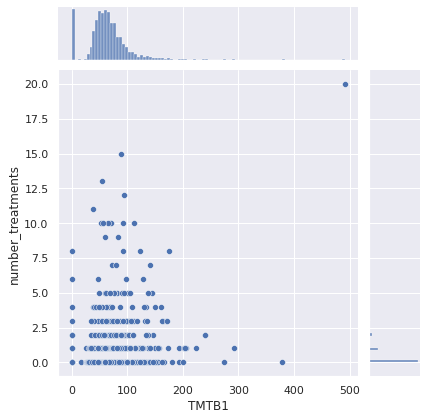

In [ ]:
sns.jointplot(x=df_num_2['TMTB1'], y=df_num_2['number_treatments'])
# esta variable indica la Prueba de creación de pistas parte B t1, los valores 1 y 200 estan concentrados entre 1 y 7 tratamientos 

In [ ]:
# variable TMTA1
pivot2_2 = df_num_2.pivot_table(index='TMTA1', values='number_treatments', aggfunc=np.sum)
pivot2_2

,number_treatments
TMTA1,
0.00,37
4.06,6
9.94,0
10.60,0
11.20,0
...,...
106.37,1
120.36,0
179.14,1


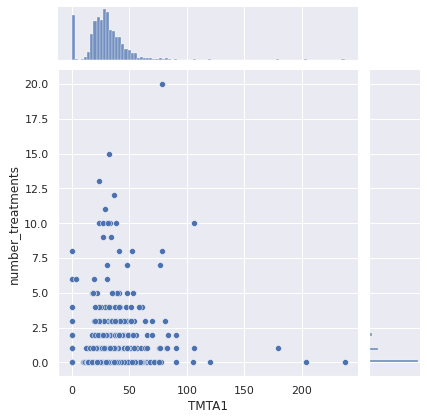

In [ ]:
sns.jointplot(x=df_num_2['TMTA1'], y=df_num_2['number_treatments'])
#  Prueba de creación de pistas parte A t1 hay algunos valores atipicos para los numeros de tratamiento mas bajos

In [ ]:
# variable BMI_T2
pivot2_3 = df_num_2.pivot_table(index='BMI_T2', values='number_treatments', aggfunc=np.sum)
pivot2_3

,number_treatments
BMI_T2,
0.00,10
15.24,0
16.92,1
17.16,0
17.22,0
...,...
46.62,0
46.75,1
47.11,0


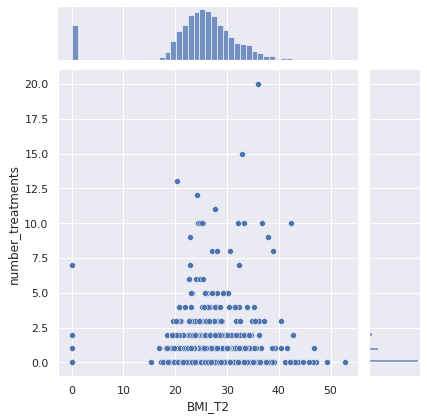

In [ ]:
sns.jointplot(x=df_num_2['BMI_T2'], y=df_num_2['number_treatments'])
# es el indice de masa corporal los valores mas bajos corresponden a los numeros de tratamiento mas bajos

In [ ]:
# variable Kyn_Trp_t1
pivot2_4 = df_num_2.pivot_table(index='Kyn_Trp_t1', values='number_treatments', aggfunc=np.sum)
pivot2_4

,number_treatments
Kyn_Trp_t1,
0.000000,379
0.013075,0
0.015089,0
0.015172,0
0.015975,0
...,...
0.063410,1
0.063907,0
0.065882,1


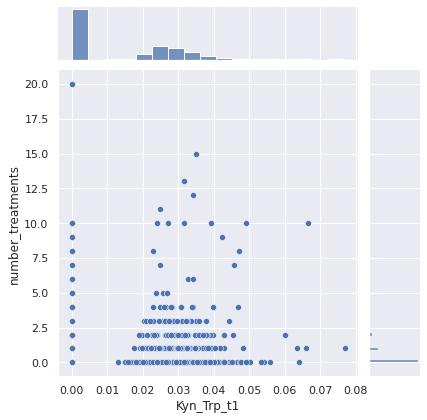

In [ ]:
sns.jointplot(x=df_num_2['Kyn_Trp_t1'], y=df_num_2['number_treatments'])
# Kyn-Tryp-Ratio (marcador de inflamación crónica de bajo grado), entre mas numeros de tratamientos los valores son mas dispersos la mayoria estan entre 1 y 4 tratamientos

In [ ]:
# variable BMI_T1
pivot2_5 = df_num_2.pivot_table(index='BMI_T1', values='number_treatments', aggfunc=np.sum)
pivot2_5

,number_treatments
BMI_T1,
0.00,10
15.24,0
16.65,1
17.22,0
17.37,1
...,...
47.05,0
48.42,1
50.73,0


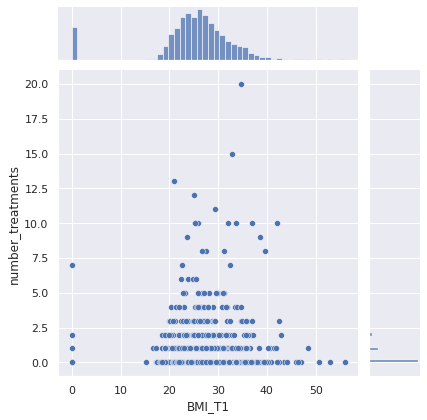

In [ ]:
sns.jointplot(x=df_num_2['BMI_T1'], y=df_num_2['number_treatments'])
# es el indice de masa corporal la mayoria de valores entre 1 y 5 igual numero de tratamientos 5, 

In [ ]:
df_num_2.describe()

,number_treatments,D2_KL_RW_t1,CVLT_LS_DG1_5_RW1,CVLT_VFWI_RW1,CVLT_WAI_RW1,CVLT_VFWII_RW1,CVLT_WAII_RW1,FWIT_FWL1,FWIT_FSB1,FWIT_INT1,...,RR_dia,HDL365_t1,LDL366_t1,TG367_t1,CRh393_t1,IL6457_t1,BDI_sum_t2R,Tryptophan_t1,Kynurenine_t1,Kyn_Trp_t1
count,1519.000000,1519.000000,1519.000000,1519.000000,1519.000000,1519.000000,1519.000000,1519.000000,1519.000000,1519.000000,...,1519.000000,1519.000000,1519.000000,1519.000000,1519.000000,1519.000000,1519.000000,1519.000000,1519.000000,1519.000000
mean,0.577354,114.797564,49.105991,10.077024,10.485188,10.350889,10.425938,27.210342,40.476972,66.749118,...,80.330481,52.174457,136.590520,130.714944,2.492442,2.744246,8.317972,30.176103,0.878196,0.013607
std,1.531544,51.411256,19.669669,4.603658,4.776522,4.838633,5.005097,28.362155,31.510554,41.513233,...,32.430346,19.339229,49.135499,82.313268,3.651516,3.758588,10.046513,32.949891,0.999122,0.015423
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,101.000000,43.000000,8.000000,9.000000,8.000000,8.000000,25.170000,37.300000,60.110000,...,78.000000,41.000000,113.000000,85.000000,0.600000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,124.000000,54.000000,11.000000,12.000000,12.000000,12.000000,29.300000,44.450000,72.660000,...,85.000000,52.000000,139.000000,112.000000,1.300000,2.250000,4.000000,0.000000,0.000000,0.000000
75%,1.000000,145.000000,62.000000,14.000000,14.000000,14.000000,14.000000,33.400000,50.785000,84.630000,...,94.000000,64.000000,167.000000,160.000000,2.800000,3.485000,13.000000,64.300000,1.770000,0.027430
max,20.000000,266.000000,81.000000,17.000000,17.000000,17.000000,16.000000,999.000000,999.000000,999.000000,...,770.000000,119.000000,321.000000,1277.000000,54.200000,78.510000,53.000000,116.800000,4.780000,0.076849


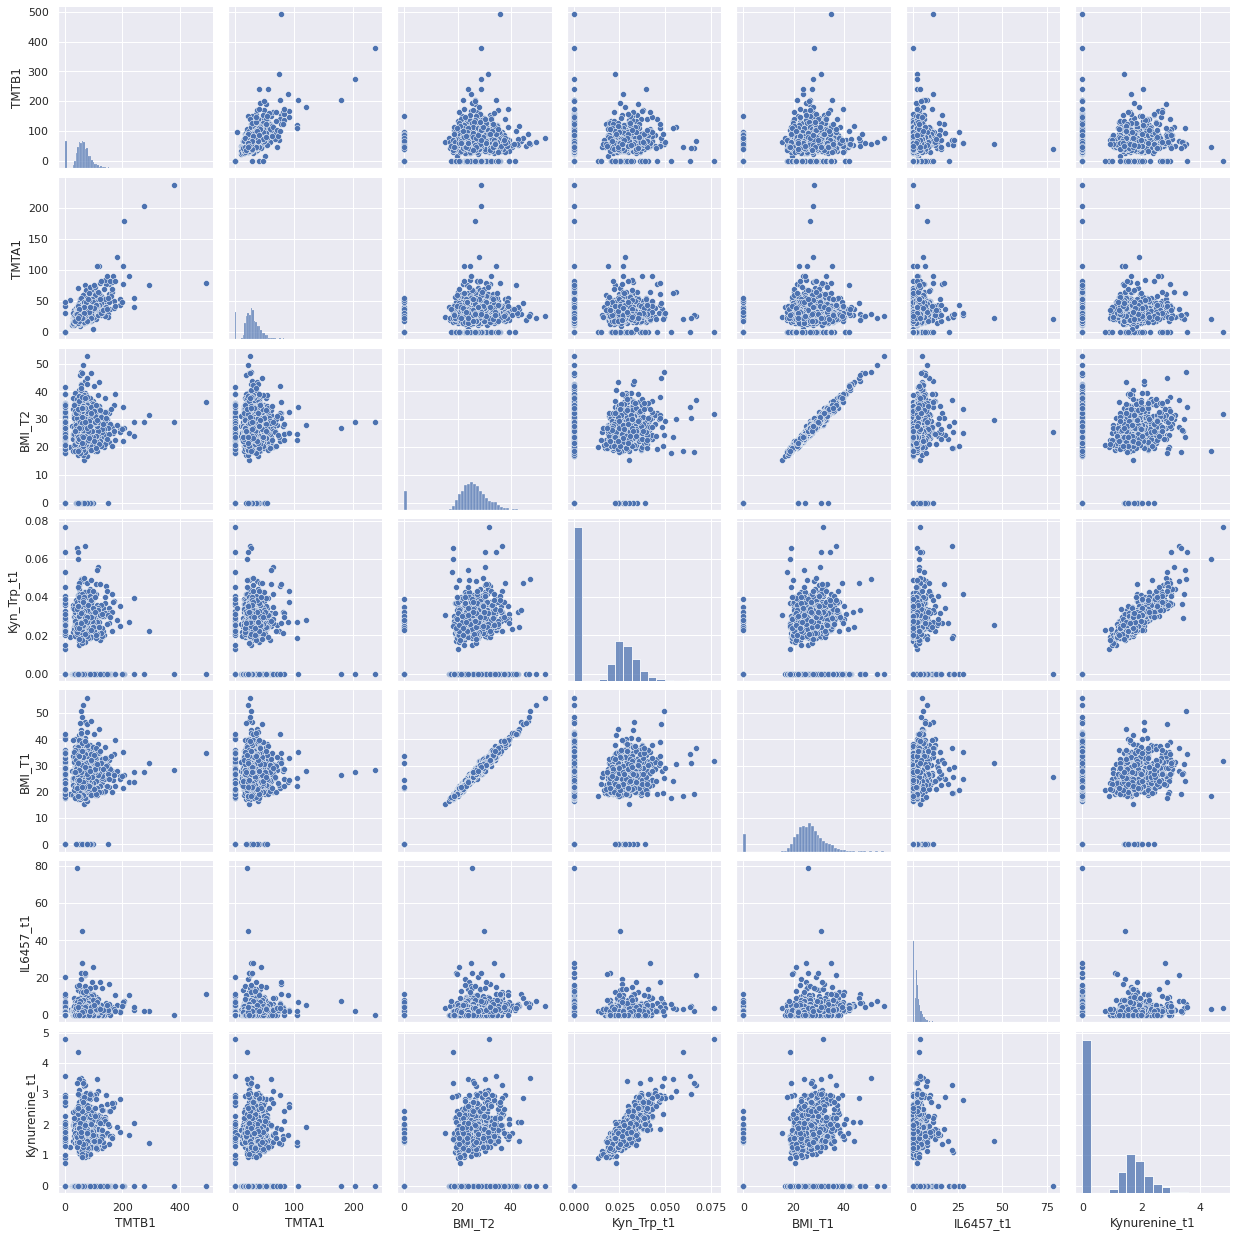

In [ ]:
# Scatter plot entre las 7 primeras variables mas correladas:

sns.set()
cols = ['TMTB1','TMTA1','BMI_T2','Kyn_Trp_t1','BMI_T1','IL6457_t1','Kynurenine_t1']
sns.pairplot(df_num_2[cols], height = 2.5)
plt.show();

La  mayoria de variables no tienen una tendencia evidente hay casos que si lo estan los BMI, la mayoria de datos son uniformes y se concetran en grupo determinado de valores

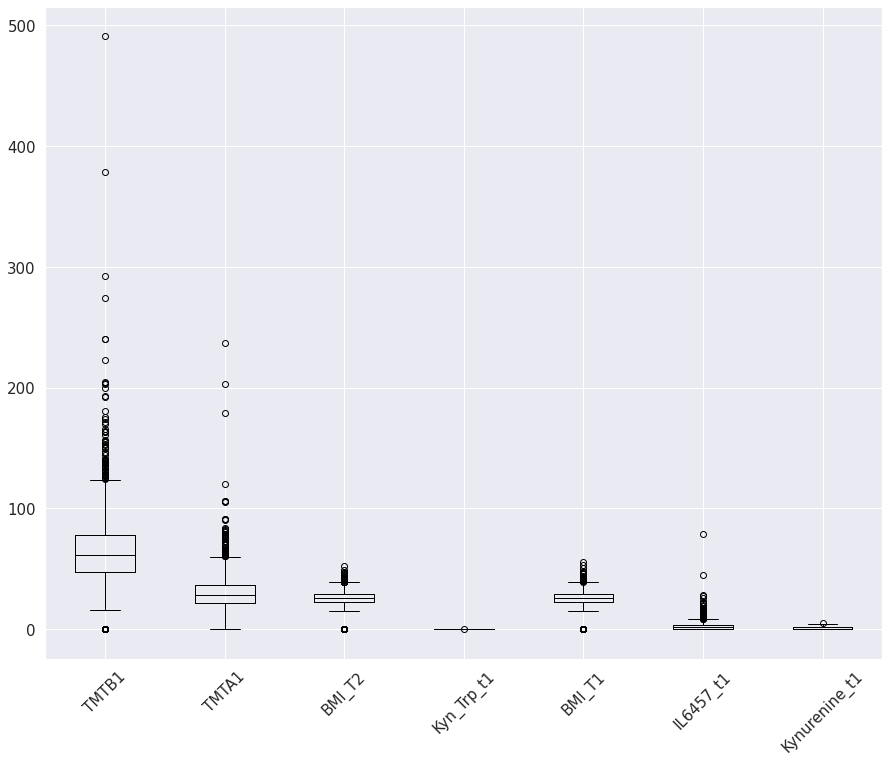

In [ ]:
# diagrama boxplot para identificar outliers dataframe df_num_2
df_num_2.boxplot(column=['TMTB1','TMTA1','BMI_T2','Kyn_Trp_t1','BMI_T1','IL6457_t1','Kynurenine_t1'], grid=True, color='black', rot=45, fontsize=15, figsize=(15,12) )

In [ ]:
df_num_2.head()

,number_treatments,D2_KL_RW_t1,CVLT_LS_DG1_5_RW1,CVLT_VFWI_RW1,CVLT_WAI_RW1,CVLT_VFWII_RW1,CVLT_WAII_RW1,FWIT_FWL1,FWIT_FSB1,FWIT_INT1,...,RR_dia,HDL365_t1,LDL366_t1,TG367_t1,CRh393_t1,IL6457_t1,BDI_sum_t2R,Tryptophan_t1,Kynurenine_t1,Kyn_Trp_t1
0,0,92.0,57,13,14,13,15,30.7,45.9,73.1,...,85,52,150,136,3.0,1.63,16,66.2,1.99,0.030060
1,0,117.0,55,9,9,10,10,25.4,41.2,61.0,...,70,57,127,100,0.7,0.00,0,57.6,1.53,0.026562
2,1,126.0,43,7,7,8,9,32.7,40.4,73.6,...,95,35,186,137,16.2,6.56,10,57.1,2.24,0.039229
3,0,130.0,54,13,12,11,12,30.9,52.7,72.5,...,93,47,140,111,0.5,1.92,16,68.1,1.55,0.022761
4,0,146.0,51,10,15,14,14,36.8,45.4,77.6,...,77,68,148,115,9.4,2.38,0,60.5,2.42,0.040000
